In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [21]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)



In [22]:
models = df_events[["person","model","storage","event","color","condition"]]
models = models.loc[models["event"] == "conversion" ,:]
#models

colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Branco" : "Blanco", "Cinza espacial" : "Negro", "Prateado" : "Plata", "Ouro Rosa" : "Rosa",
"Rosa": "Rosa", "Cinza" : "Plata", "Azul" : "Azul", "Preto Vermelho" : "Negro", "Prata" : "Plata", "Platinum" : "Plata", "Preto Matte" : "Negro",
"Branco Vermelho" : "Blanco", "Ouro" : "Dorado", "Titânio" : "Plata", "Ametista" : "Otros", "Preto Brillhante" : "Negro", "Indigo" : "Otros",
"Amarelo" : "Otros", "Vermelho" : "Otros", "Bambu" : "Otros", "Cabernet" : "Otros", "Preto Azul" : "Negro", "Couro Vintage" : "Otros", "Azul Topázio" : "Azul"}

models["in_color"] = models['color'].apply(lambda x: colores.get(x, 'Basura'))

#models = models.loc[models['in_color'] != 'Basura']
#colores = models['in_color'].value_counts()
#colores
models.count()

In [23]:

df = df_events.loc[(df_events["country"].isnull() == False) & (df_events["country"] != "Unknown"),:]
df = df[['person','country','region']]

df = df.drop_duplicates(subset='person')


#df2 = df[["person","region","country"]]
models = models.merge(df, on='person')
#coalese o fillna
#models

In [24]:
#s16_GB = models.loc[models["storage"] == "16GB"]
s16_GB = models["country"].value_counts()
s16_GB

Brazil            1058
United Kingdom       2
United States        1
Name: country, dtype: int64

In [29]:
brazil = models.loc[models["country"] == "Brazil"]
sbrazil = brazil["storage"].value_counts()
sbrazil.index = [16,32,8,64,128,4,0.512,256]
sbrazil = sbrazil.sort_index()
sbrazil

0.512        3
4.000       14
8.000      179
16.000     503
32.000     242
64.000      93
128.000     23
256.000      1
Name: storage, dtype: int64

In [7]:
uk = models.loc[models["country"] == "United Kingdom"]
uk = uk["storage"].value_counts()
uk.index = [16,8,64,0.512,4,32,256,128]
uk = uk.sort_index()
uk


0.512      0
4.000      0
8.000      0
16.000     2
32.000     0
64.000     0
128.000    0
256.000    0
Name: storage, dtype: int64

In [8]:
eeuu = models.loc[models["country"] == "United States"]
eeuu = eeuu["storage"].value_counts()
eeuu.index = [16,8,64,0.512,4,32,256,128]
eeuu = eeuu.sort_index()
eeuu

0.512      0
4.000      0
8.000      0
16.000     1
32.000     0
64.000     0
128.000    0
256.000    0
Name: storage, dtype: int64

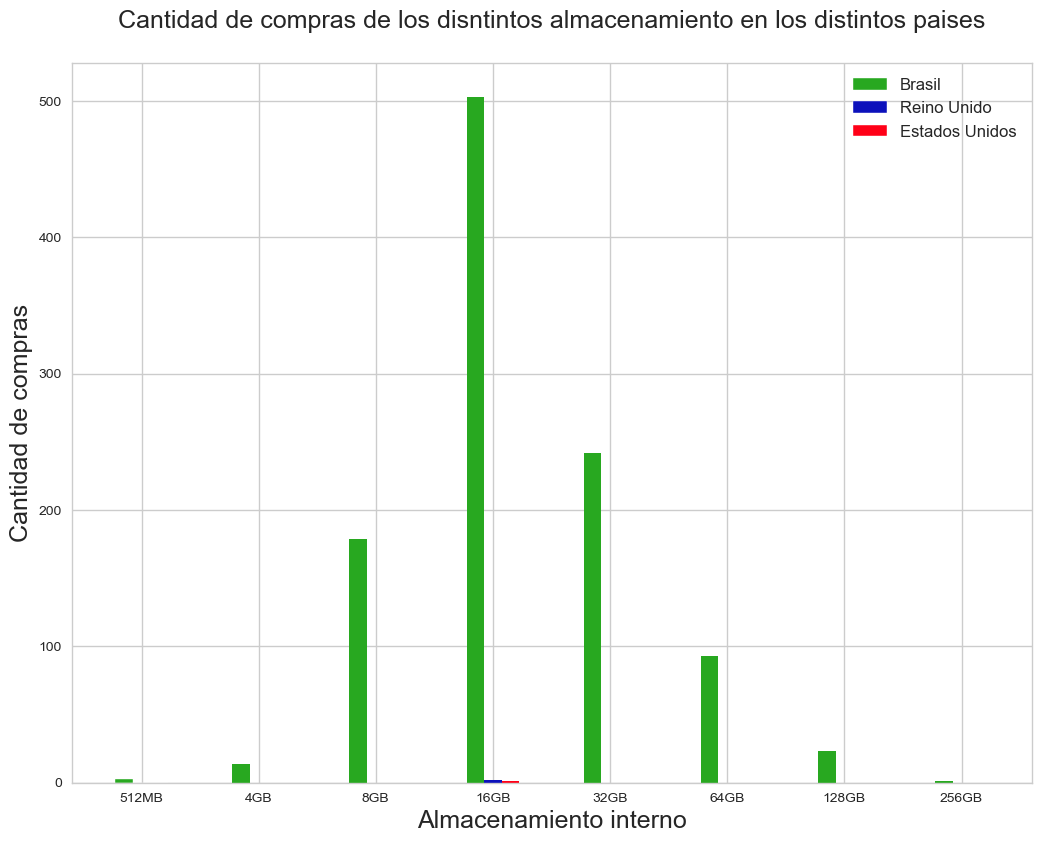

In [30]:
nombres = ["512MB","4GB","8GB","16GB","32GB","64GB","128GB","256GB"]

X = np.arange (len(nombres))
Y1 = sbrazil.values
Y2 = uk.values
Y3 = eeuu.values

plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.15 ,Y1,facecolor = "#28A820",label = "Brasil", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X,Y2,facecolor = "#0C11BB",label = "Reino Unido", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15 ,Y3,facecolor = "#FF0017",label = "Estados Unidos", width = 0.15, align = "center",edgecolor = "white")



plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Almacenamiento interno",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Cantidad de compras de los disntintos almacenamiento en los distintos paises\n', fontsize = 18)

plt.legend(loc="upper right", fontsize = 12)
plt.show()

In [31]:
#brazil = models.loc[(models["country"] == "Brazil")&(models["region"] != "Unknown")&(models["event"] == "conversion" )]
#sao_pablo = brazil.loc[brazil["region"] == "Sao Paulo"]
brazil = brazil.loc[brazil["region"] != "Unknown"]
top_5_regiones = brazil["region"].value_counts().head()
top_5_regiones

Sao Paulo         288
Minas Gerais      104
Rio de Janeiro     93
Bahia              79
Maranhao           43
Name: region, dtype: int64

In [32]:
sao_pablo = brazil.loc[(brazil["region"] == "Sao Paulo")]
sao_pablo = sao_pablo["storage"].value_counts()
sao_pablo.index = [16,32,8,64,128,0.512,4,256]
sao_pablo = sao_pablo.sort_index()
sao_pablo

0.512        2
4.000        2
8.000       36
16.000     146
32.000      67
64.000      27
128.000      8
256.000      0
Name: storage, dtype: int64

In [33]:
minas_gerais  = brazil.loc[brazil["region"] == "Minas Gerais"]
minas_gerais = minas_gerais["storage"].value_counts()
minas_gerais.index = [16,32,8,64,128,0.512,4,256]
minas_gerais = minas_gerais.sort_index()
minas_gerais

0.512       0
4.000       0
8.000      17
16.000     50
32.000     23
64.000     12
128.000     2
256.000     0
Name: storage, dtype: int64

In [34]:
rio  = brazil.loc[brazil["region"] == "Rio de Janeiro"]
rio = rio["storage"].value_counts()

rio.index = [16,32,8,64,4,0.512,256,128]
rio = rio.sort_index()
rio

0.512       0
4.000       4
8.000      13
16.000     36
32.000     28
64.000     12
128.000     0
256.000     0
Name: storage, dtype: int64

In [35]:
bahia  = brazil.loc[brazil["region"] == "Bahia"]
bahia = bahia["storage"].value_counts()
bahia.index = [16,8,32,64,0.512,4,128,256]
bahia  = bahia.sort_index()
bahia 

0.512       1
4.000       1
8.000      15
16.000     46
32.000     14
64.000      1
128.000     1
256.000     0
Name: storage, dtype: int64

In [36]:
maranhao  = brazil.loc[brazil["region"] == "Maranhao"]
maranhao = maranhao["storage"].value_counts()
maranhao.index = [16,32,4,8,64,0.512,256,128]
maranhao  = maranhao.sort_index()
maranhao 

0.512       0
4.000       3
8.000       2
16.000     21
32.000     15
64.000      2
128.000     0
256.000     0
Name: storage, dtype: int64

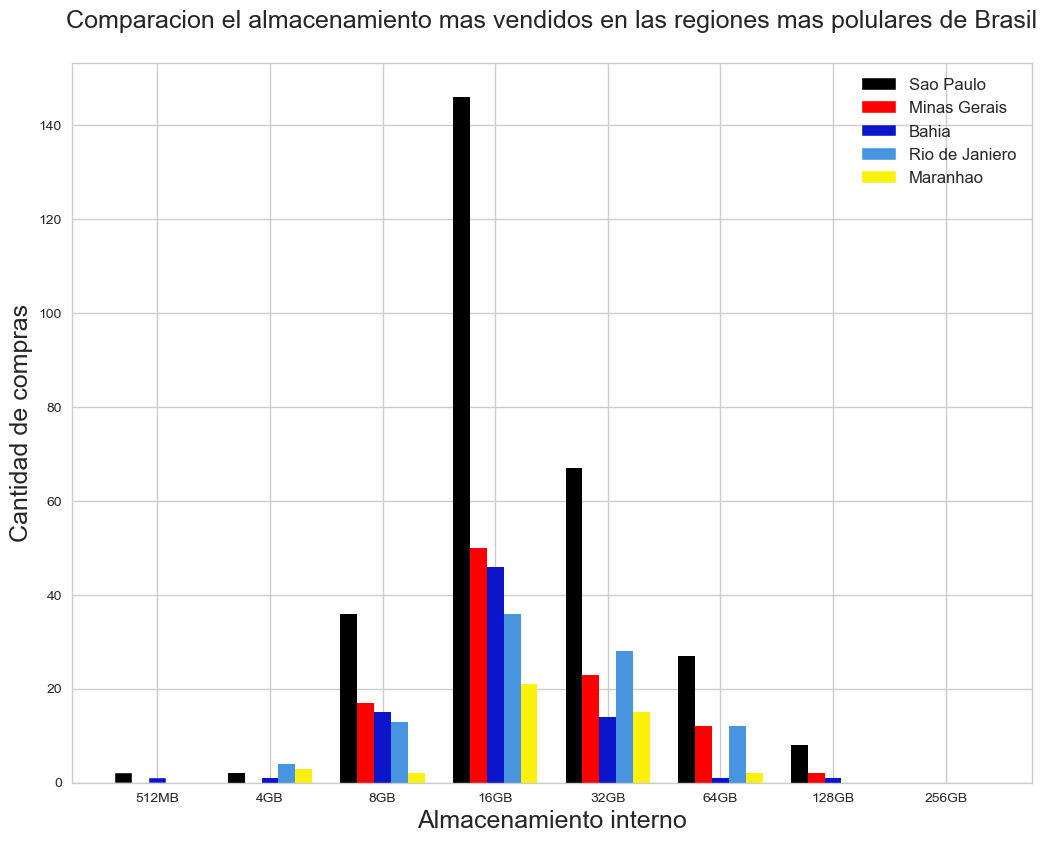

In [37]:
nombres = ["512MB","4GB","8GB","16GB","32GB","64GB","128GB","256GB"]

X = np.arange (len(nombres))
Y1 = sao_pablo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio.values
Y5 = maranhao.values



plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Maranhao", width = 0.15, align = "center",edgecolor = "white")


plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Almacenamiento interno",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Comparacion el almacenamiento mas vendidos en las regiones mas polulares de Brasil\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv('./fiuba-trocafone-tp1-final-set/events.csv', dtype=types, low_memory=False)

In [3]:
#Cantidad de campaign y de search engine
filter_colum = df_events[["person", "event", "campaign_source", "search_engine", "timestamp"]]
filter_colum

,person,event,campaign_source,search_engine,timestamp
0,0004b0a2,ad campaign hit,criteo,NaN,2018-05-31 23:38:05
1,0004b0a2,visited site,NaN,NaN,2018-05-31 23:38:05
2,0004b0a2,viewed product,NaN,NaN,2018-05-31 23:38:09
3,0004b0a2,checkout,NaN,NaN,2018-05-31 23:38:40
4,0006a21a,viewed product,NaN,NaN,2018-05-29 13:29:25
5,0006a21a,visited site,NaN,NaN,2018-05-29 13:29:26
6,0006a21a,ad campaign hit,criteo,NaN,2018-05-29 13:29:27
7,0006a21a,checkout,NaN,NaN,2018-05-29 13:29:35
8,000a54b2,generic listing,NaN,NaN,2018-04-09 20:12:31
9,000a54b2,visited site,NaN,NaN,2018-04-09 20:12:31


In [4]:
hit_contains = filter_colum.loc[filter_colum["event"].str.contains("hit")]
hit_contains

,person,event,campaign_source,search_engine,timestamp
0,0004b0a2,ad campaign hit,criteo,NaN,2018-05-31 23:38:05
6,0006a21a,ad campaign hit,criteo,NaN,2018-05-29 13:29:27
10,000a54b2,search engine hit,NaN,Google,2018-04-09 20:12:31
11,000a54b2,ad campaign hit,google,NaN,2018-04-09 20:12:31
15,000a54b2,ad campaign hit,google,NaN,2018-05-24 11:21:07
17,000a54b2,search engine hit,NaN,Google,2018-05-24 11:21:07
47,00184bf9,search engine hit,NaN,Google,2018-04-06 05:12:05
62,00184bf9,search engine hit,NaN,Google,2018-04-06 05:12:59
97,0019c395,search engine hit,NaN,Google,2018-05-17 00:08:56
99,0019c395,ad campaign hit,google,NaN,2018-05-17 00:08:56


In [5]:
campaing = hit_contains.loc[filter_colum["event"] == "ad campaign hit"]
search = hit_contains.loc[filter_colum["event"] == "search engine hit"]

In [6]:
campaing["event"].value_counts()

ad campaign hit      82827
visited site             0
viewed product           0
staticpage               0
searched products        0
search engine hit        0
lead                     0
generic listing          0
conversion               0
checkout                 0
brand listing            0
Name: event, dtype: int64

In [7]:
search["event"].value_counts()

search engine hit    50957
visited site             0
viewed product           0
staticpage               0
searched products        0
lead                     0
generic listing          0
conversion               0
checkout                 0
brand listing            0
ad campaign hit          0
Name: event, dtype: int64

In [8]:
group = filter_colum.groupby(["person", "event"])
group.count()

campaign_source  search_engine  timestamp
person   event                                                       
0004b0a2 ad campaign hit                1.0            0.0        1.0
         brand listing                  NaN            NaN        NaN
         checkout                       0.0            0.0        1.0
         conversion                     NaN            NaN        NaN
         generic listing                NaN            NaN        NaN
         lead                           NaN            NaN        NaN
         search engine hit              NaN            NaN        NaN
         searched products              NaN            NaN        NaN
         staticpage                     NaN            NaN        NaN
         viewed product                 0.0            0.0        1.0
         visited site                   0.0            0.0        1.0
0006a21a ad campaign hit                1.0            0.0        1.0
         brand listing                  NaN            NaN        NaN
         checkout                       0.0            0.0        1.0
         conversion                     NaN            NaN        NaN
         generic listing                NaN            NaN        NaN
         lead                           NaN            NaN        NaN
         search engine hit              NaN            NaN        NaN
         searched products              NaN            NaN        NaN
         staticpage                     NaN            NaN        NaN
         viewed product                 0.0            0.0        1.0
         visited site                   0.0            0.0        1.0
000a54b2 ad campaign hit                2.0            0.0        2.0
         brand listing                  0.0            0.0        6.0
         checkout                       0.0            0.0        1.0
         conversion                     NaN            NaN        NaN
         generic listing                0.0            0.0        5.0
         lead                           NaN            NaN        NaN
         search engine hit              0.0            2.0        2.0
         searched products              NaN            NaN        NaN
...                                     ...            ...        ...
ffff8106 conversion                     NaN            NaN        NaN
         generic listing                0.0            0.0        1.0
         lead                           NaN            NaN        NaN
         search engine hit              0.0            1.0        1.0
         searched products              NaN            NaN        NaN
         staticpage                     NaN            NaN        NaN
         viewed product                 0.0            0.0        3.0
         visited site                   0.0            0.0        1.0
ffffa8d1 ad campaign hit                3.0            0.0        3.0
         brand listing                  NaN            NaN        NaN
         checkout                       0.0            0.0        1.0
         conversion                     NaN            NaN        NaN
         generic listing                0.0            0.0        4.0
         lead                           NaN            NaN        NaN
         search engine hit              0.0            3.0        3.0
         searched products              0.0            0.0        2.0
         staticpage                     NaN            NaN        NaN
         viewed product                 0.0            0.0       19.0
         visited site                   0.0            0.0        4.0
ffffac8a ad campaign hit                1.0            0.0        1.0
         brand listing                  NaN            NaN        NaN
         checkout                       0.0            0.0        1.0
         conversion                     NaN            NaN        NaN
         generic listing                NaN            NaN        NaN
         lead                         

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [3]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [4]:
galaxy_j5 = df_events.loc[(df_events["model"] == "Samsung Galaxy J5") & (df_events["event"] == "conversion"),:]
galaxy_j5 = galaxy_j5[["city","region","country","event","timestamp","condition"]]
galaxy_j5.head()

,city,region,country,event,timestamp,condition
6985,NaN,NaN,NaN,conversion,2018-02-09 22:07:07,Bom
18502,NaN,NaN,NaN,conversion,2018-01-10 18:59:05,Muito Bom
20959,NaN,NaN,NaN,conversion,2018-04-21 18:54:14,Excelente
37398,NaN,NaN,NaN,conversion,2018-04-29 13:18:15,Bom
50967,NaN,NaN,NaN,conversion,2018-03-13 12:24:21,Muito Bom


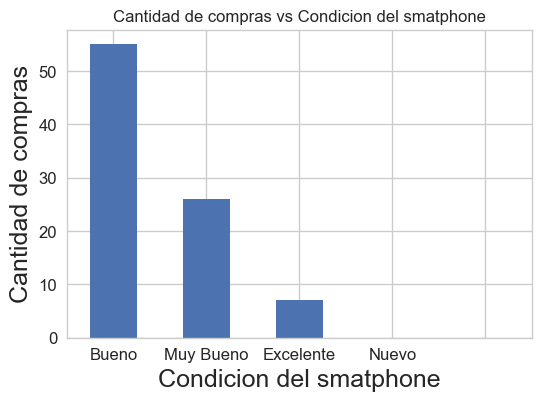

In [5]:
condition = galaxy_j5["condition"].value_counts()

ax = condition.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(6,4),legend = False, fontsize = 12)
ax.set_xlabel("Condicion del smatphone", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["Bueno","Muy Bueno","Excelente","Nuevo"],rotation = "horizontal")
plt.show()

In [6]:
#dias

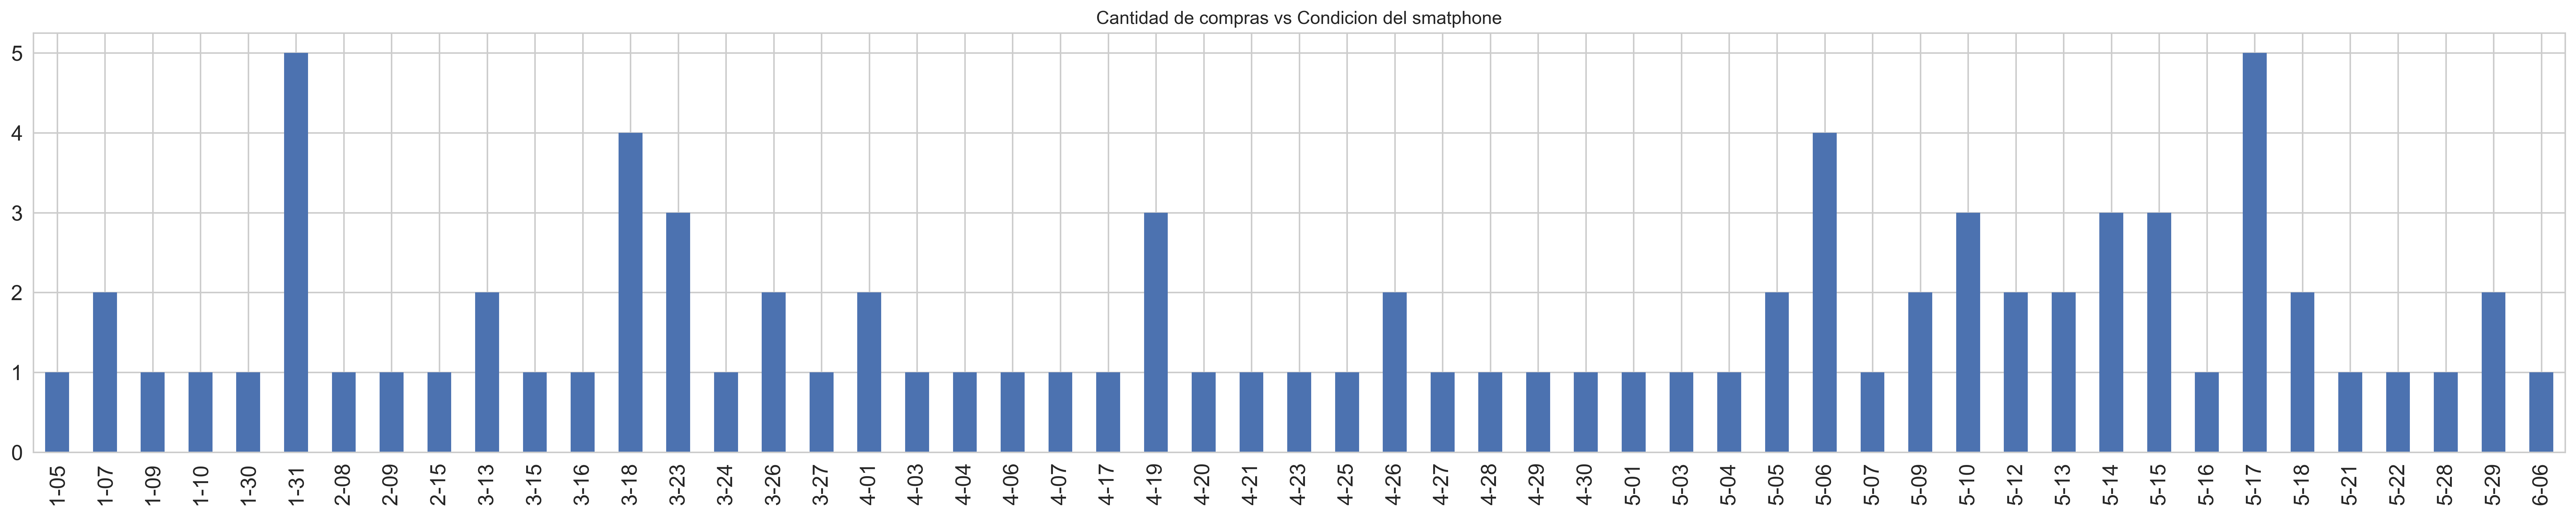

In [84]:
galaxy_j5['dia_mes'] = galaxy_j5['timestamp'].apply(lambda x: x.split(' ')[0][-5:])
#galaxy_j5.sort_values(by = galaxy)
fechas = galaxy_j5['dia_mes'].value_counts()
#fechas  = fechas.to_frame(name = "Fechas").reset_index()
fechas
#fechas.columns= [["Fecha","Frecuencia"]]
#fechas.sort_values(fechas["Fecha"])
fechas
#fechas.sort(fechas.index)

fechas = galaxy_j5.sort_values(by = "timestamp",ascending = True)["timestamp"]
meses=pd.to_datetime(fechas).dt.month
dias=pd.to_datetime(fechas).dt.day
serie_final= meses.map(lambda x: str(x))+'-'+dias.map(lambda x: str(x) if x>9 else "0"+str(x))
serie_final = serie_final.value_counts().sort_index()



#galaxy_j5["mes"] = pd.to_datetime(galaxy_j5["timestamp"]).dt.month
#galaxy_j5["dia"] = pd.to_datetime(galaxy_j5["timestamp"]).dt.day
#galaxy_j5
ax = serie_final.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(30,5),legend = False, fontsize = 14)

#plt.rc('figure', dpi=350)
#g=sns.barplot(x=serie_final.index,y=serie_final.values)
#g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.show()


In [85]:
serie_final

1-05    1
1-07    2
1-09    1
1-10    1
1-30    1
1-31    5
2-08    1
2-09    1
2-15    1
3-13    2
3-15    1
3-16    1
3-18    4
3-23    3
3-24    1
3-26    2
3-27    1
4-01    2
4-03    1
4-04    1
4-06    1
4-07    1
4-17    1
4-19    3
4-20    1
4-21    1
4-23    1
4-25    1
4-26    2
4-27    1
4-28    1
4-29    1
4-30    1
5-01    1
5-03    1
5-04    1
5-05    2
5-06    4
5-07    1
5-09    2
5-10    3
5-12    2
5-13    2
5-14    3
5-15    3
5-16    1
5-17    5
5-18    2
5-21    1
5-22    1
5-28    1
5-29    2
6-06    1
Name: timestamp, dtype: int64

In [108]:
serie_final_t = serie_final.to_dict()
serie_final_t
fin = False
for i in range (1,7):
    if fin:
        break
    for j in range (1,32):
        if j <10:
            fecha = str(i)+'-0'+str(j)
        else:
            fecha = str(i)+'-'+str(j)
        
        if i == 2 and j <= 29:
            break
        if i in [4,6] and j == 31:
            break
        if i == 6 and j >= 10:
            fin = True
            break
        if not fecha in serie_final_t:
            serie_final_t[fecha] = 0

serie_final_t = pd.Series(serie_final_t)
serie_final_t

1-01    0
1-02    0
1-03    0
1-04    0
1-05    1
1-06    0
1-07    2
1-08    0
1-09    1
1-10    1
1-11    0
1-12    0
1-13    0
1-14    0
1-15    0
1-16    0
1-17    0
1-18    0
1-19    0
1-20    0
1-21    0
1-22    0
1-23    0
1-24    0
1-25    0
1-26    0
1-27    0
1-28    0
1-29    0
1-30    1
       ..
5-11    0
5-12    2
5-13    2
5-14    3
5-15    3
5-16    1
5-17    5
5-18    2
5-19    0
5-20    0
5-21    1
5-22    1
5-23    0
5-24    0
5-25    0
5-26    0
5-27    0
5-28    1
5-29    2
5-30    0
5-31    0
6-01    0
6-02    0
6-03    0
6-04    0
6-05    0
6-06    1
6-07    0
6-08    0
6-09    0
Length: 135, dtype: int64

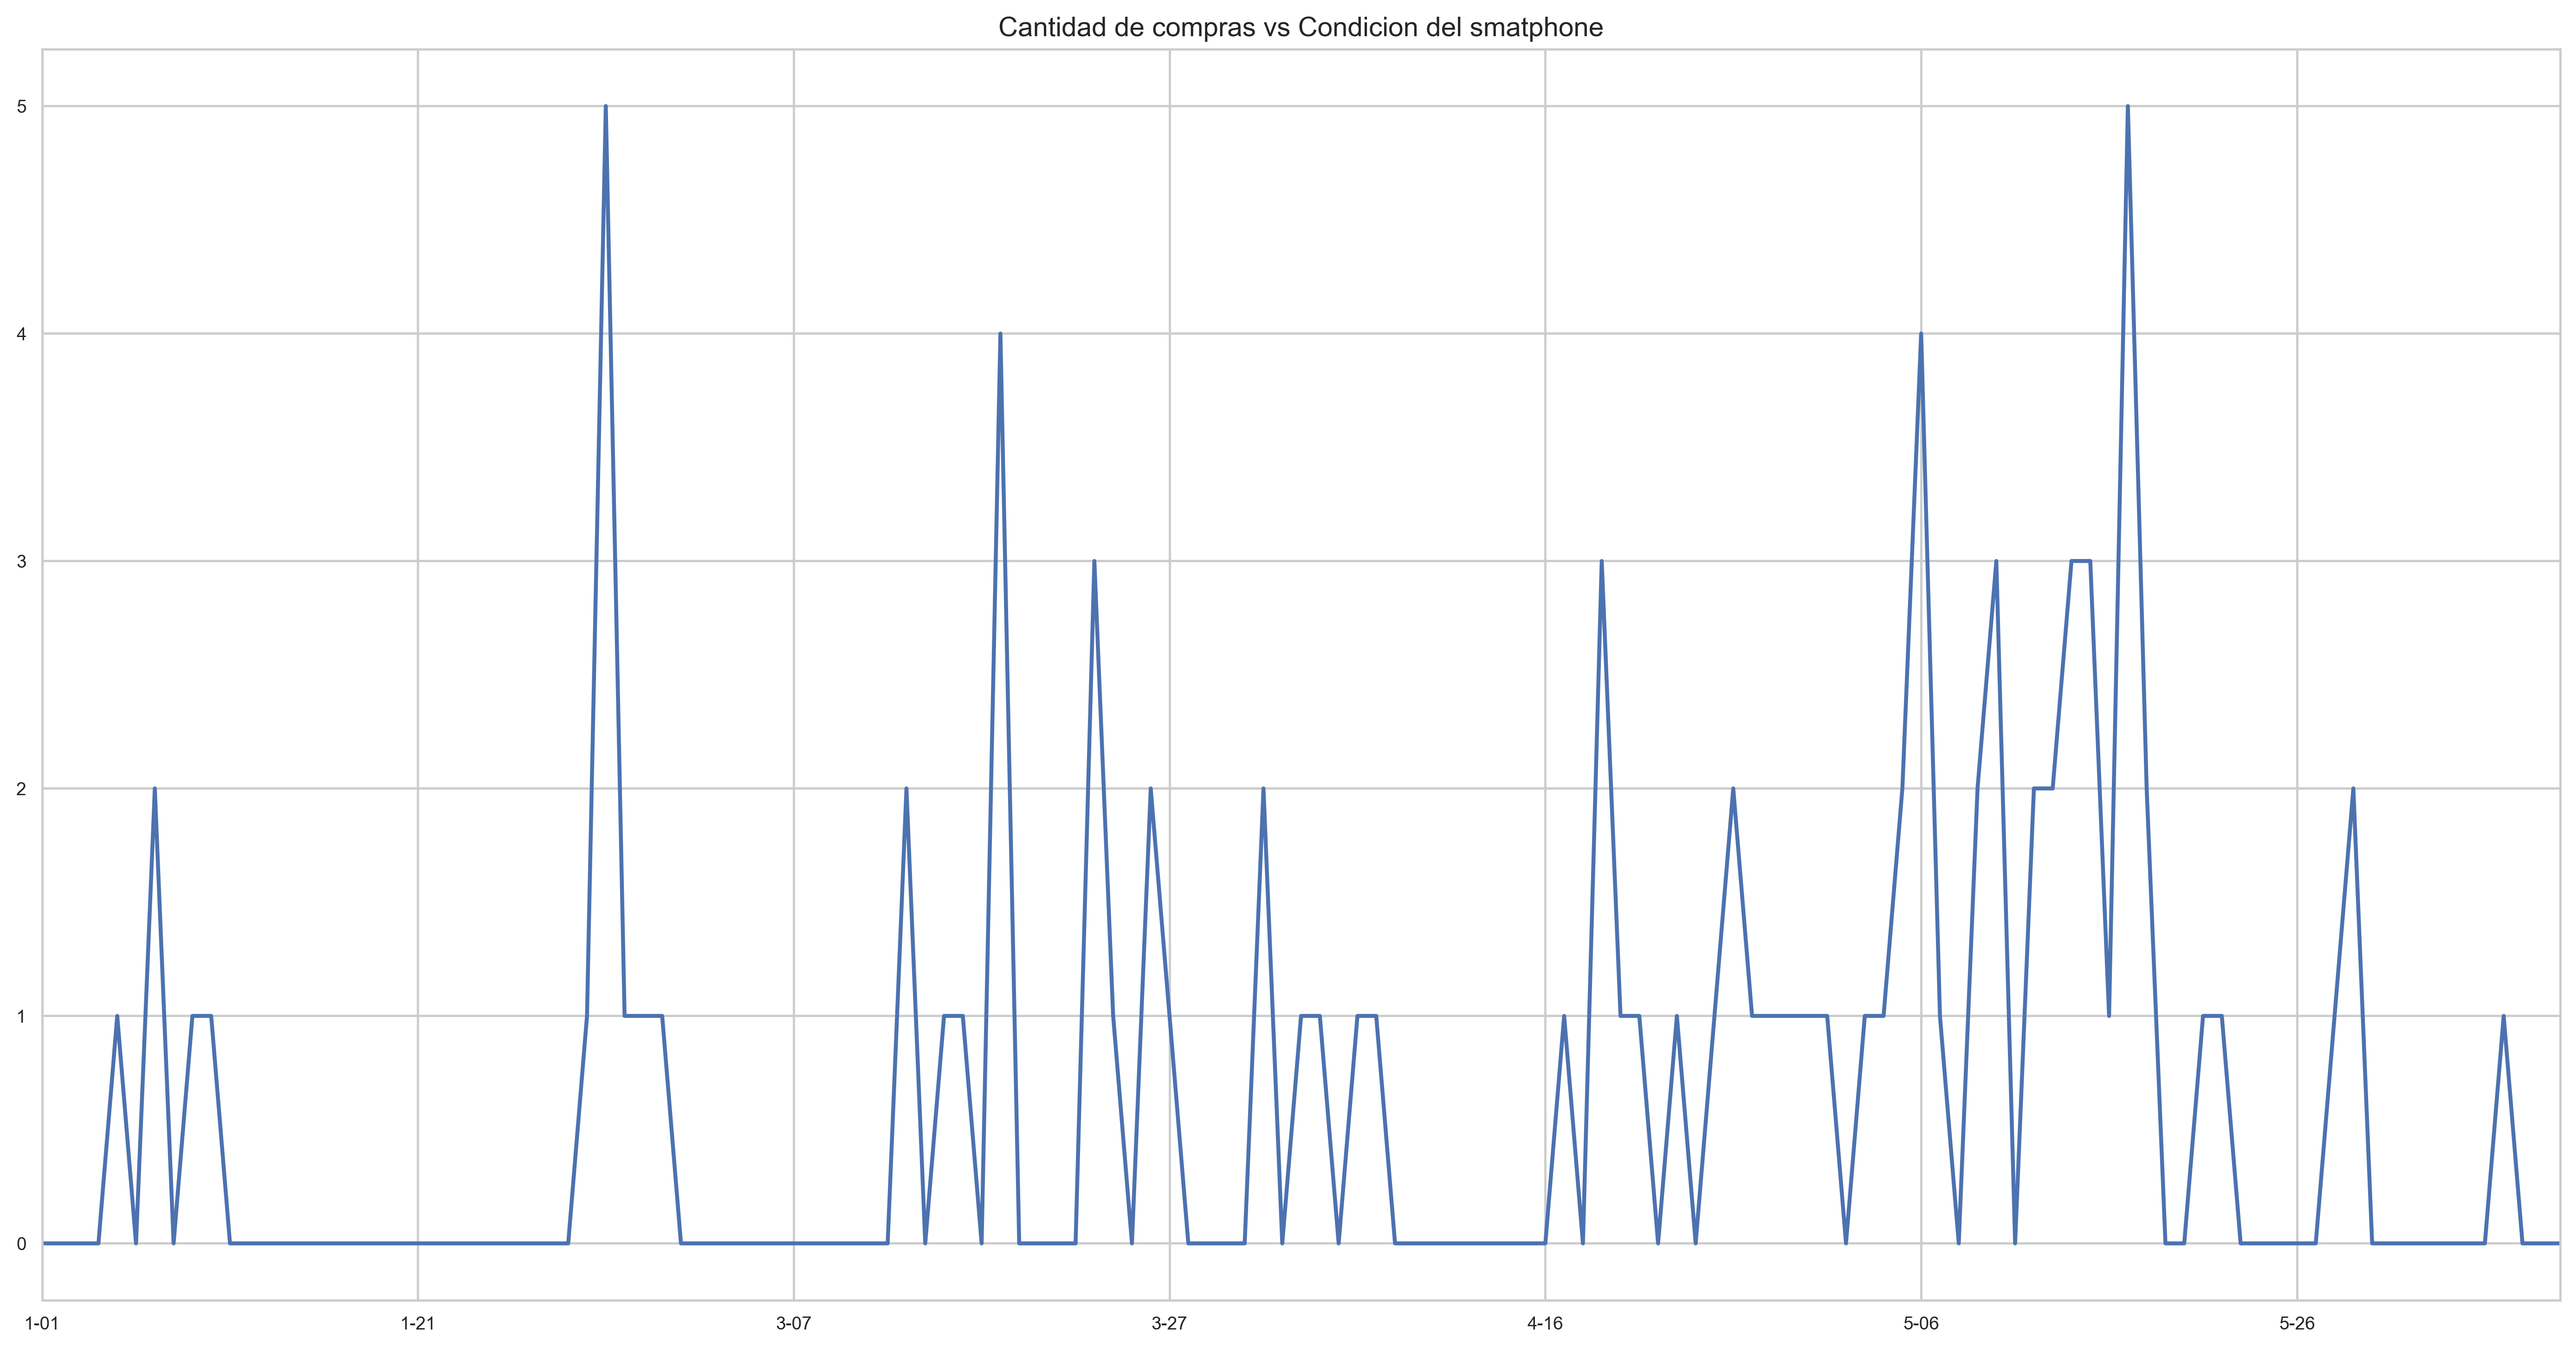

In [101]:
ax = serie_final_t.plot(kind = 'line', title = "Cantidad de compras vs Condicion del smatphone",figsize =(20,10),legend = False, fontsize = 8)
lista = serie_final_t.index.tolist()

plt.show()

lista = ["","","","",'1-05',"",'1-07',"",'1-09','1-10',"","","","","","","","","","","","","","","","","","","",'1-30','1-31',
 "","","","","","","",'2-08','2-09',"","","","","",'2-15',"","","","","","","","","","","","","",
 "","","","","","","","","","","","",'3-13',"",'3-15','3-16',"",'3-18',"","","","",'3-23','3-24',"",'3-26','3-27',"","","","",
 '4-01',"",'4-03','4-04',"",'4-06','4-07',"","","","","","","","","",'4-17',"",'4-19','4-20','4-21',"",'4-23',"",'4-25','4-26','4-27','4-28','4-29','4-30',
 '5-01',"",'5-03','5-04','5-05','5-06','5-07',"",'5-09','5-10',"",'5-12','5-13','5-14','5-15','5-16','5-17','5-18',"","",'5-21','5-22',"","","","","",'5-28','5-29',"","",
 "","","","","",'6-06']

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [9]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [10]:
#df_events.columns

In [11]:
#df_events.head()


In [12]:
models = df_events.loc[df_events["storage"].isnull() == False,:]
models = models[["model","storage","event","color","condition"]]
models = models.loc[models["event"] == "conversion" ,:]
models.head()

,model,storage,event,color,condition
220,Motorola Moto X2,32GB,conversion,Couro Vintage,Muito Bom
2282,Samsung Galaxy Core Plus Duos TV,4GB,conversion,Branco,Muito Bom
2547,Samsung Galaxy S6 Flat,32GB,conversion,Branco,Muito Bom
4245,iPhone 5s,32GB,conversion,Cinza espacial,Bom
6985,Samsung Galaxy J5,16GB,conversion,Preto,Bom


In [13]:
models.count()

model        1172
storage      1172
event        1172
color        1172
condition    1172
dtype: int64

# Cantidad de compras para los distintos tipos de alamacenamiento interno

In [14]:
storage = models["storage"].value_counts()
storage.index = [16,32,64,8,128,4,256,0.512]
storage = storage.sort_index()
#storage.index = ["256GB","128GB","64GB","32GB","16GB","8GB","4GB","512MB"]
storage

0.512        1
4.000       17
8.000      102
16.000     552
32.000     265
64.000     205
128.000     27
256.000      3
Name: storage, dtype: int64

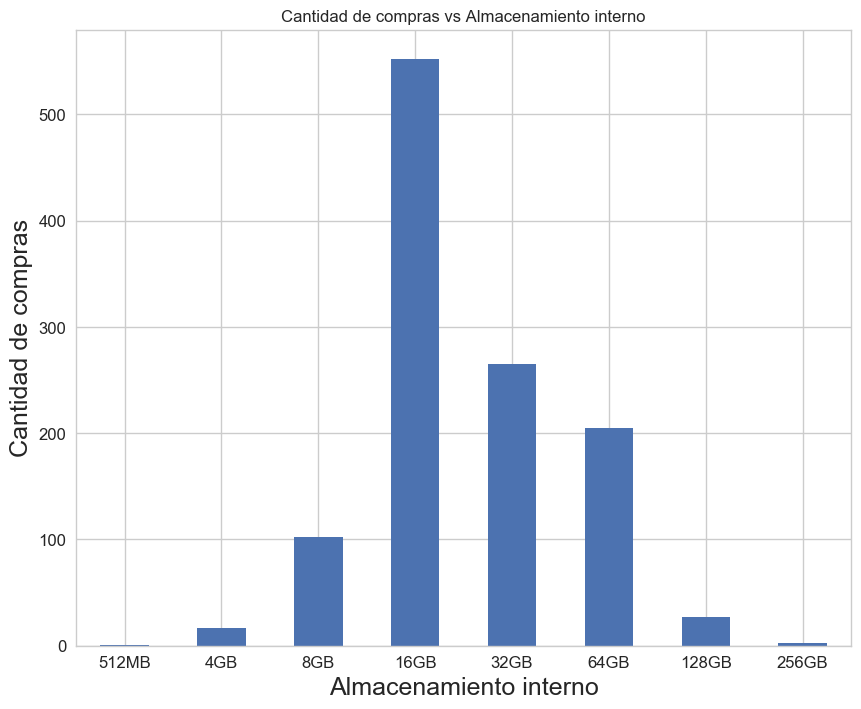

In [18]:
ax = storage.plot(kind = 'bar', title = "Cantidad de compras vs Almacenamiento interno",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Almacenamiento interno", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["512MB","4GB","8GB","16GB","32GB","64GB","128GB","256GB"], rotation = "horizontal")
plt.show()

# Modelos más comprados

In [19]:
model = models["model"].value_counts()
model = model.head(20)
model.head(20)

Samsung Galaxy J5                    88
iPhone 5s                            84
iPhone 6                             71
Samsung Galaxy S6 Flat               39
iPhone 6S                            37
iPhone 5c                            33
Motorola Moto G3 4G                  30
Motorola Moto G4 Plus                30
Samsung Galaxy J7                    28
Samsung Galaxy A5                    27
Samsung Galaxy Gran Prime Duos TV    24
Samsung Galaxy J7 Prime              20
Samsung Galaxy Note 4                19
Samsung Galaxy S5                    18
Samsung Galaxy S7                    18
Samsung Galaxy Gran Prime 3G Duos    18
Samsung Galaxy S3 Mini               17
Samsung Galaxy S7 Edge               17
Motorola Moto G2 3G Dual             17
iPhone SE                            17
Name: model, dtype: int64

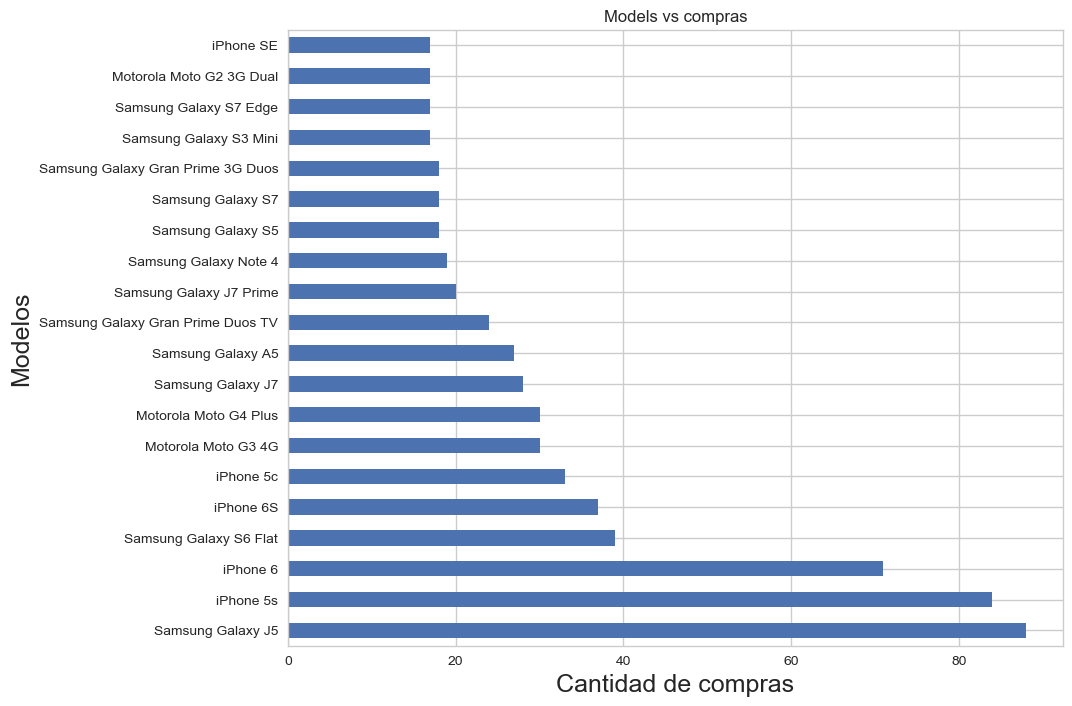

In [20]:
ax = model.plot(kind = 'barh', title = "Models vs compras",figsize =(10,8),legend = False, fontsize = 10)
ax.set_xlabel("Cantidad de compras",fontsize = 18)
ax.set_ylabel("Modelos",fontsize = 18)
plt.show()

# Distintos colores por cantidad de compras  

In [21]:
color = models["color"].value_counts()
color = color.head(30)
color

Preto              368
Dourado            269
Branco             216
Cinza espacial      89
Prateado            51
Ouro Rosa           32
Rosa                30
Cinza               23
Azul                22
Preto Vermelho      11
Prata                8
Platinum             7
Preto Matte          6
Branco Vermelho      6
Verde                5
Ouro                 4
Titânio              4
Ametista             4
Preto Brilhante      3
Indigo               3
Amarelo              2
Vermelho             2
Bambu                2
Cabernet             2
Preto Azul           1
Couro Vintage        1
Azul Topázio         1
Branco Verde         0
Branco Dourado       0
Branco Pink          0
Name: color, dtype: int64

colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Cinza espacial" : "Negro", "Branco": "Blanco", "Prateado" : "Plata", "Ouro Rosa" : "Rosa", "Prata" : "Plata", "Rosa" : "Rosa",
          "Preto Matte": "Negro", "Platinum" :"Plata", "Cinza" : "Plata", "Azul": "Azul", "Ametista": "Otros", "Ouro": "Dorado", "Preto Brilhante" : "Negro", "Vermelho": "Otros",
          "Bambu":"Otros","Preto Vermelho": "Negro","Titânio": "Otros", "Verde": "Otros", "Branco Vermelho" : "Blanco", "indigo": "Otros", "Amarelo": "Otros", "Cabernet": "Otros", 
          "Couro Vintage": "Otros", "Azul Topázio": "Azul"}



In [22]:
colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Branco" : "Blanco", "Cinza espacial" : "Negro", "Prateado" : "Plata", "Ouro Rosa" : "Rosa",
"Rosa": "Rosa", "Cinza" : "Plata", "Azul" : "Azul", "Preto Vermelho" : "Negro", "Prata" : "Plata", "Platinum" : "Plata", "Preto Matte" : "Negro",
"Branco Vermelho" : "Blanco", "Ouro" : "Dorado", "Titânio" : "Plata", "Ametista" : "Otros", "Preto Brillhante" : "Negro", "Indigo" : "Otros",
"Amarelo" : "Otros", "Vermelho" : "Otros", "Bambu" : "Otros", "Cabernet" : "Otros", "Preto Azul" : "Negro", "Couro Vintage" : "Otros", "Azul Topázio" : "Azul"}

models["in_color"] = models['color'].apply(lambda x: colores.get(x, 'Basura'))

models = models.loc[models['in_color'] != 'Basura']
colores = models['in_color'].value_counts()
colores


Negro     475
Dorado    273
Blanco    222
Plata      93
Rosa       62
Azul       23
Otros      16
Name: in_color, dtype: int64

In [28]:
#colores = {"Negro": color["Preto"] + color["Cinza espacial"] + color["Preto Matte"] + color["Preto Brilhante"] ,
#           "Plata": color["Prateado"] + color["Prata"] + color["Platinum"] + color["Cinza"] + color["Titânio"] ,
#           "Dorado": color["Ouro"] + color["Dourado"],
#            "Rosa": color["Ouro Rosa"] + color["Rosa"],
#           "Azul": color["Azul"], "Otros" : color["Ametista"] + color["Vermelho"] +  color["Bambu"] +  color["Preto Vermelho"] + color["Verde"]}
#colores

#plt.bar(range(len(colores)), list(colores.values()))
#plt.xticks(range(len(colores)), list(colores.keys()))
         

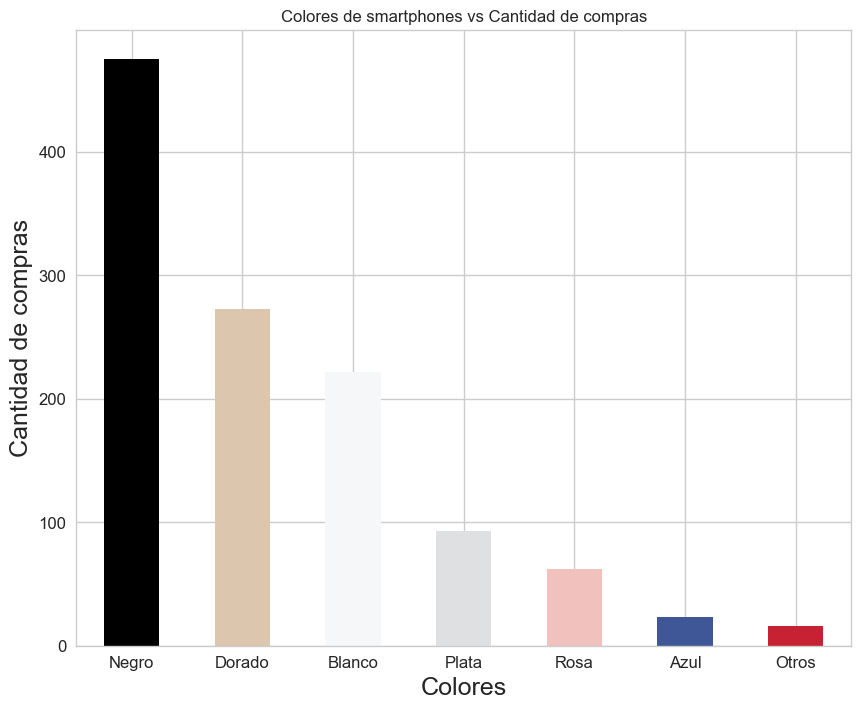

In [29]:
ax = colores.plot(kind = 'bar', title = "Colores de smartphones vs Cantidad de compras",figsize =(10,8),legend = False, rot=0, fontsize = 12,color = [["#000000","#DCC6AE","#F6F7F9","#DFE0E2","#F1C1BD" ,"#3F5796","#C72233"]])
ax.set_xlabel("Colores",fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
#ax.set_xticklabels(ax.getaxis.rotation = "horizontal")


plt.show()

## No se puede ver el color sefun pais, debido que no hay datos del mismo

models = df_events.loc[df_events["color"].isnull() == False,:]
models = models[["model","storage","event","color",'country']]
models = models.loc[models["event"] == "checkout" ,:]
models.head()

models2 = models.loc[models['country'].isnull() == False,:]
models2
models.count()

In [30]:
condition = models["condition"].value_counts()
condition

Bom                   532
Muito Bom             351
Excelente             257
Bom - Sem Touch ID     22
Novo                    2
Name: condition, dtype: int64

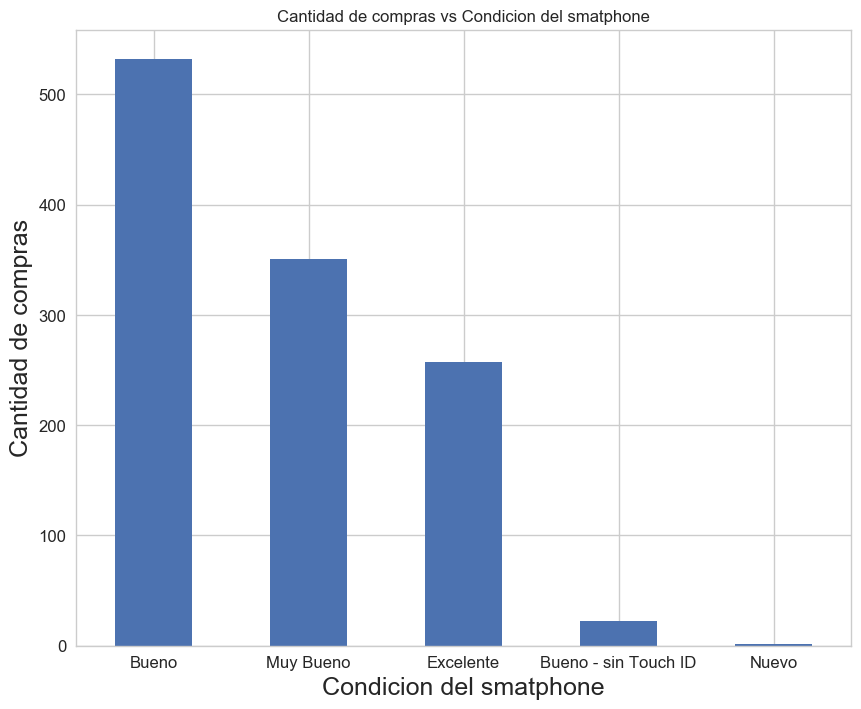

In [31]:
ax = condition.plot(kind = 'bar', title = "Cantidad de compras vs Condicion del smatphone",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Condicion del smatphone", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["Bueno","Muy Bueno","Excelente","Bueno - sin Touch ID","Nuevo"],rotation = "horizontal")
plt.show()

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv('./fiuba-trocafone-tp1-final-set/events.csv', dtype=types, low_memory=False)

In [ ]:
df_events.columns

In [ ]:
df_events.head()

In [56]:
#Ranking del sitio web que utiliza el usuario para ingresar a Trocafone 
trafico = df_events.groupby('campaign_source').agg({'person': 'count'})
trafico.reset_index(inplace=True)
trafico.columns =['campaing_source','count']

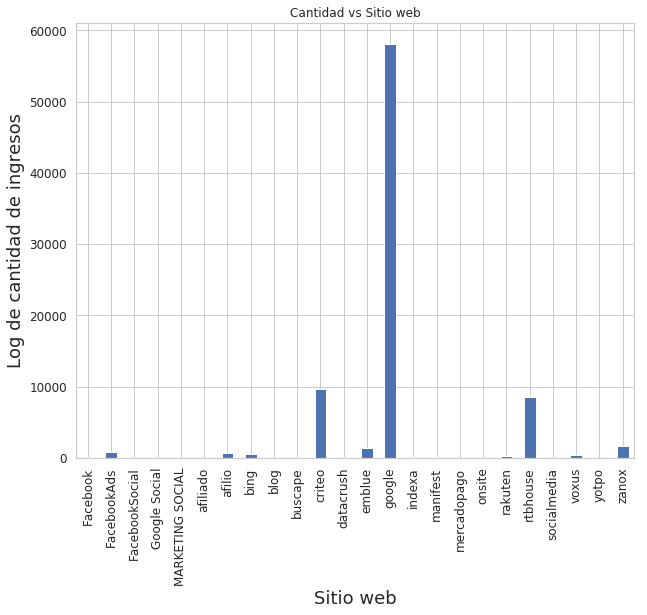

In [57]:
ax = trafico.plot(kind = 'bar', title = "Cantidad vs Sitio web",figsize =(10,8),legend = False, fontsize = 12,  color=[plot.cm.Paired(np.arange(len(trafico)))])
ax.set_xlabel("Sitio web",fontsize = 18)
ax.set_ylabel("Log de cantidad de ingresos",fontsize = 18)
ax.set_xticklabels(trafico['campaing_source'].values)
plt.show()

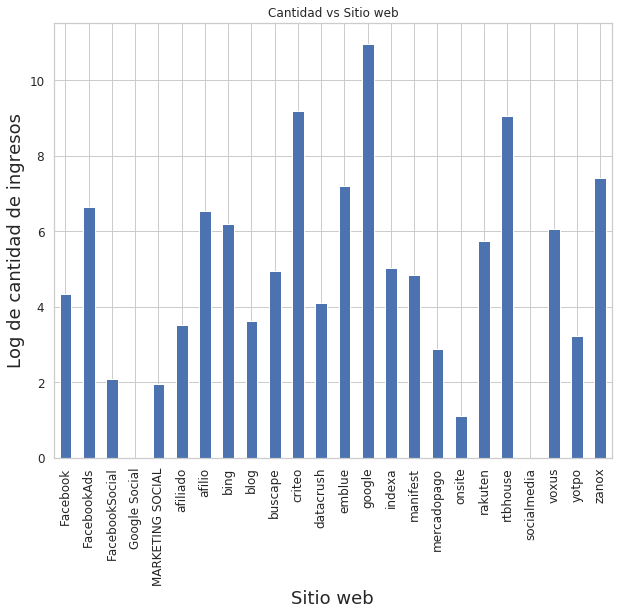

In [58]:
trafico['count'] = np.log(trafico['count'])
ax = trafico.plot(kind = 'bar', title = "Cantidad vs Sitio web",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Sitio web",fontsize = 18)
ax.set_ylabel("Log de cantidad de ingresos",fontsize = 18)
ax.set_xticklabels(trafico['campaing_source'].values)
plt.show()

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [43]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [44]:
df = df_events[["person","city","region","country"]]
df = df.loc[(df["city"].isnull() == False) & (df["city"] != "Unknown"),:]

df = df.drop_duplicates(subset='person')

#_df = df_events.loc[(df_events['person'].isin(usuarios)) & (df_events["city"].isnull() == False) & (df_events["city"] != "Unknown") ] 

df2 = df_events[["person","search_term","sku","event","model"]]
dfs = df2.merge(df, on='person')
#coalese o fillna
dfs["country"].value_counts()

Brazil                904742
United States           3399
Argentina                616
Canada                   142
Switzerland              137
Portugal                 103
French Guiana             82
France                    70
Netherlands               63
United Kingdom            61
Poland                    51
Mozambique                36
Romania                   33
Italy                     32
Dominican Republic        29
China                     28
Paraguay                  15
India                     12
Russia                     9
Morocco                    8
Uruguay                    7
Mexico                     6
Turkey                     5
Sri Lanka                  5
Bangladesh                 4
South Africa               4
Venezuela                  3
Name: country, dtype: int64

In [29]:
dfs = dfs.loc[dfs["search_term"].isnull() == False]
dfs["search_term"] = dfs['search_term'].apply(lambda x: x.lower())
dfs["search_term"].value_counts().head(20)

iphone 6          3056
iphone            2653
iphone 6s         2367
iphone 7          1220
iphone 5s         1023
motorola           765
j5                 754
j7                 751
iphone 6 plus      708
s7                 688
s8                 640
iphone se          580
samsung            557
iphone 5           550
iphone 6s plus     537
iphone 7 plus      476
s6                 429
j7 prime           404
moto g5            362
moto g             319
Name: search_term, dtype: int64

In [6]:
search_term = dfs["search_term"].value_counts().head(20)

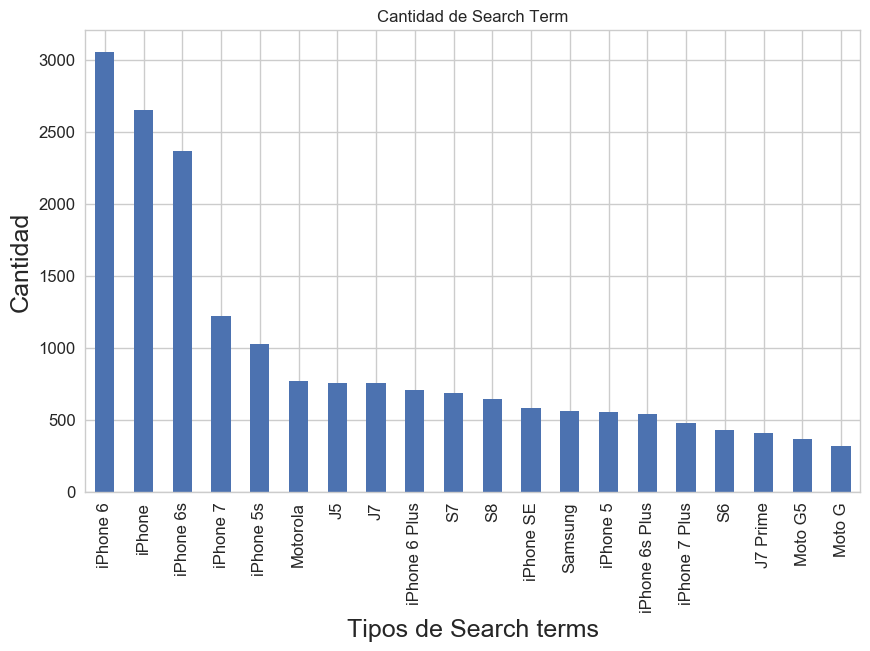

In [7]:
ax = search_term.plot(kind = 'bar', title = "Cantidad de Search Term",figsize =(10,6),legend = False, fontsize = 12)
ax.set_xlabel("Tipos de Search terms", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)


ax.set_xticklabels(["iPhone 6","iPhone","iPhone 6s","iPhone 7","iPhone 5s","Motorola","J5","J7","iPhone 6 Plus","S7","S8","iPhone SE","Samsung","iPhone 5","iPhone 6s Plus","iPhone 7 Plus","S6","J7 Prime","Moto G5","Moto G"])
plt.show()

In [8]:
dfs_brazil = dfs.loc[dfs["country"] == "Brazil"]
#dfs_brazil["search_term"] = dfs_brazil['search_term'].apply(lambda x: x.lower())
dfs_brazil["search_term"].value_counts().head(20)


iphone 6          3052
iphone            2638
iphone 6s         2365
iphone 7          1220
iphone 5s         1017
motorola           759
j5                 754
j7                 746
iphone 6 plus      708
s7                 688
s8                 637
iphone se          580
iphone 5           550
samsung            549
iphone 6s plus     537
iphone 7 plus      476
s6                 428
j7 prime           404
moto g5            362
moto g             319
Name: search_term, dtype: int64

## Si solo queresmos ver las search term de brazil, vemos que no cambia respecto a verlo para todos lo paises, por ende no es necesario ver este caso en particular

In [9]:
dfs_usa = dfs.loc[dfs["country"] == "United States"]
dfs_usa["search_term"].value_counts().head(10)

note 3            14
note              11
samsung            8
iphone 5s          6
motorola           6
sony               4
iphone 6           4
iphone             3
moto g4 plus       3
samung celular     3
Name: search_term, dtype: int64

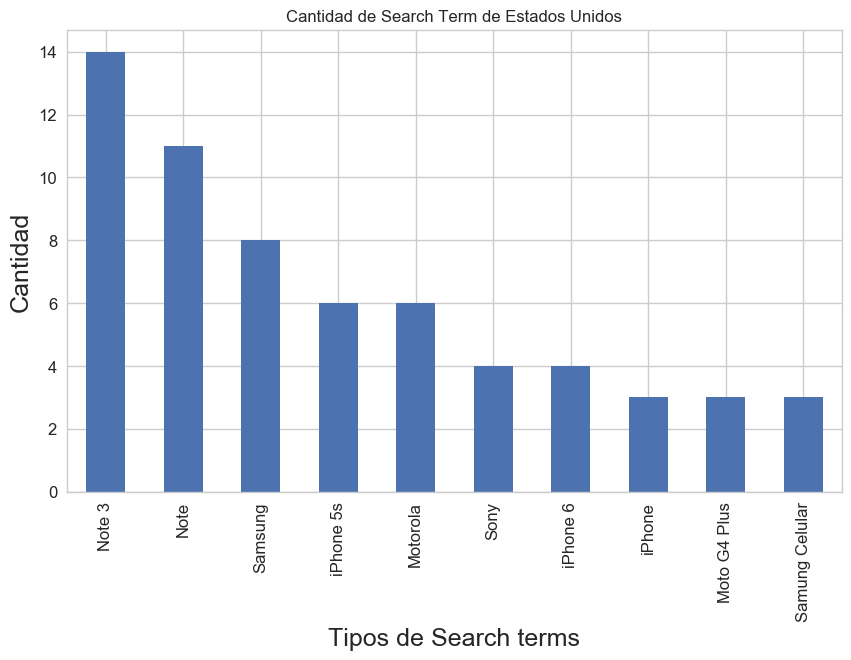

In [60]:
search_term_usa = dfs_usa["search_term"].value_counts().head(10)
ax = search_term_usa.plot(kind = 'bar', title = "Cantidad de Search Term de Estados Unidos",figsize =(10,6),legend = False, fontsize = 12)
ax.set_xlabel("Tipos de Search terms", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)

ax.set_xticklabels(["Note 3","Note","Samsung","iPhone 5s", "Motorola","Sony","iPhone 6","iPhone","Moto G4 Plus","Samung Celular"])

plt.show()

In [45]:
dfs["region"].value_counts().head()


Sao Paulo         314156
Minas Gerais       96995
Rio de Janeiro     83653
Bahia              69413
Pernambuco         36651
Name: region, dtype: int64

In [46]:
dfs_sp = dfs.loc[dfs["region"] == "Sao Paulo"]
sao_paulo = dfs_sp["search_term"].value_counts().head(10)

lista = sao_paulo.index.tolist()
sao_paulo = sao_paulo.sort_index()
sao_paulo

Iphone       487
Iphone 6     369
Iphone 6s    295
Samsung      254
iPhone       300
iPhone 6     468
iPhone 6s    253
iphone       352
iphone 6     326
iphone 6s    341
Name: search_term, dtype: int64

In [47]:
dfs_mn = dfs.loc[(dfs["region"] == "Minas Gerais")&(dfs["search_term"].isin(lista))]
minas_gerais = dfs_mn["search_term"].value_counts().head(10).sort_index()
minas_gerais

Iphone       60
Iphone 6     64
Iphone 6s    37
Samsung      41
iPhone       35
iPhone 6     50
iPhone 6s    56
iphone       39
iphone 6     55
iphone 6s    93
Name: search_term, dtype: int64

In [48]:
dfs_rj = dfs.loc[(dfs["region"] == "Rio de Janeiro")&(dfs["search_term"].isin(lista))]
rio_de_janeiro = dfs_rj["search_term"].value_counts().head(10).sort_index()
rio_de_janeiro

Iphone       160
Iphone 6      78
Iphone 6s     46
Samsung       21
iPhone        77
iPhone 6      80
iPhone 6s     96
iphone        54
iphone 6     150
iphone 6s     62
Name: search_term, dtype: int64

In [49]:
dfs_ba = dfs.loc[(dfs["region"] == "Bahia")&(dfs["search_term"].isin(lista))]
bahia = dfs_ba["search_term"].value_counts().head(10).sort_index()
bahia

Iphone       83
Iphone 6     49
Iphone 6s    45
Samsung      26
iPhone       45
iPhone 6     49
iPhone 6s    34
iphone       75
iphone 6     43
iphone 6s    42
Name: search_term, dtype: int64

In [50]:
dfs_per = dfs.loc[(dfs["region"] == "Pernambuco")&(dfs["search_term"].isin(lista))]
pernambuco = dfs_per["search_term"].value_counts().head(10).sort_index()
pernambuco

Iphone       52
Iphone 6     15
Iphone 6s    14
Samsung      29
iPhone       10
iPhone 6     22
iPhone 6s    35
iphone       31
iphone 6     11
iphone 6s    17
Name: search_term, dtype: int64

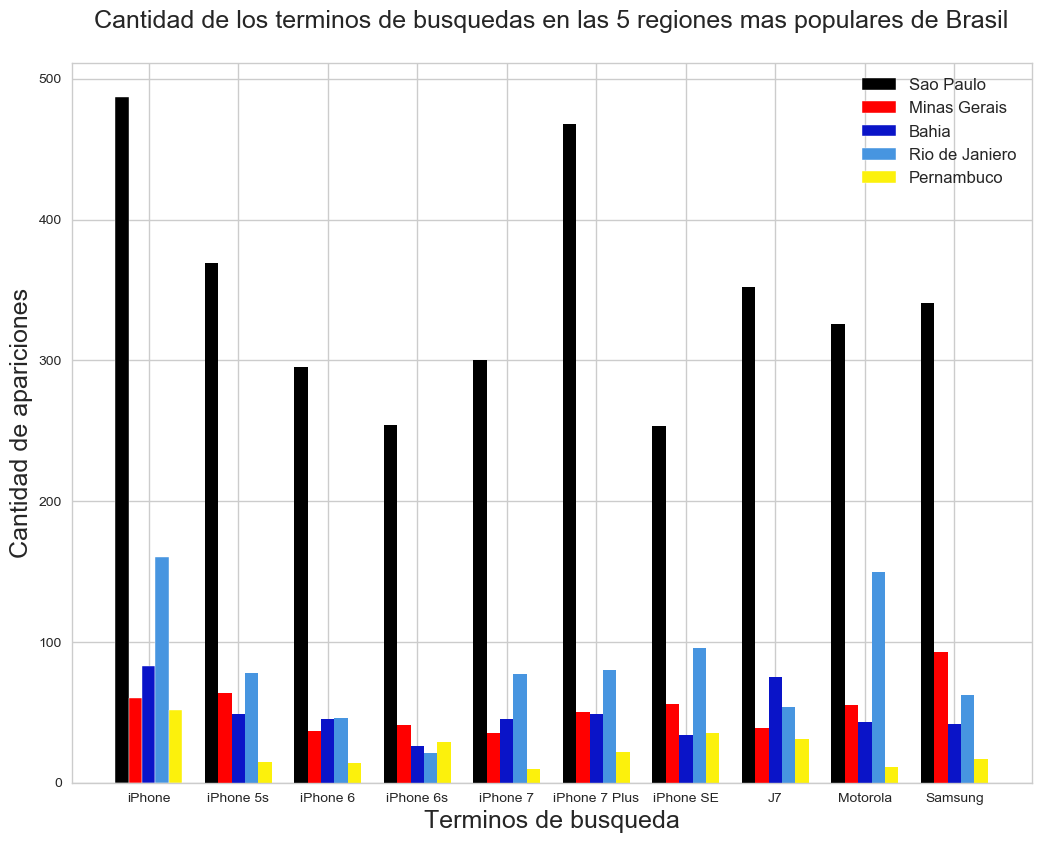

In [51]:
X = np.arange (len(lista))
Y1 = sao_paulo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio_de_janeiro.values
Y5 = pernambuco.values


plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Pernambuco", width = 0.15, align = "center",edgecolor = "white")

nombres = ["iPhone","iPhone 5s","iPhone 6","iPhone 6s","iPhone 7","iPhone 7 Plus","iPhone SE","J7","Motorola","Samsung"]

plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Terminos de busqueda",fontsize = 18)
plt.ylabel('Cantidad de apariciones', fontsize = 18)

plt.title('Cantidad de los terminos de busquedas en las 5 regiones mas populares de Brasil\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()

In [52]:
dfs_c = dfs.loc[(dfs["event"] == "conversion")&(dfs["country"] == "Brazil")]
models = dfs_c["region"].value_counts().head(10)
models

Sao Paulo             330
Minas Gerais          107
Rio de Janeiro        101
Bahia                 100
Maranhao               45
Federal District       34
Rio Grande do Sul      30
Pernambuco             26
Ceara                  22
Mato Grosso do Sul     20
Name: region, dtype: int64

In [53]:
models_sp = dfs_c.loc[dfs_c["region"] == "Sao Paulo"]
sao_paulo = models_sp["model"].value_counts().head(10)

"""modelos = pd.Series( [0,0,0,0,0,0,0,0,0,0],
    index = ['Samsung Galaxy J5', 'Samsung Galaxy J7', 'Samsung Galaxy S5', 'Samsung Galaxy S5', 'Samsung Galaxy S6 Edge', 'iPhone 5c', 'iPhone 5s', 'iPhone 6',
     'iPhone 6S', 'iPhone SE'])"""
lista = sao_paulo.index.tolist()
sao_paulo = sao_paulo.sort_index()
sao_paulo

Samsung Galaxy J5          24
Samsung Galaxy J7          11
Samsung Galaxy J7 Prime     8
Samsung Galaxy S5           7
Samsung Galaxy S6 Edge      9
iPhone 5c                   8
iPhone 5s                  21
iPhone 6                   38
iPhone 6S                  13
iPhone SE                  10
Name: model, dtype: int64

In [54]:
models_mn = dfs_c.loc[(dfs_c["region"] == "Minas Gerais")&(dfs_c["model"].isin(lista))]
minas_gerais = models_mn["model"].value_counts().head(8)

modelos = pd.Series( [0,0],
    index = ["iPhone 5c","iPhone SE"])
minas_gerais  = minas_gerais.append(modelos)
minas_gerais  = minas_gerais.sort_index()
minas_gerais 


Samsung Galaxy J5          8
Samsung Galaxy J7          4
Samsung Galaxy J7 Prime    2
Samsung Galaxy S5          2
Samsung Galaxy S6 Edge     1
iPhone 5c                  0
iPhone 5s                  3
iPhone 6                   4
iPhone 6S                  4
iPhone SE                  0
dtype: int64

In [55]:
models_rj = dfs_c.loc[(dfs_c["region"] == "Rio de Janeiro")&(dfs_c["model"].isin(lista))]
rio_de_janeiro = models_rj["model"].value_counts().head(7)

modelos = pd.Series( [0,0,0],
    index = ["Samsung Galaxy J7 Prime","Samsung Galaxy J7","Samsung Galaxy S6 Edge"])

rio_de_janeiro = rio_de_janeiro.append(modelos)
rio_de_janeiro = rio_de_janeiro.sort_index()
rio_de_janeiro

Samsung Galaxy J5           2
Samsung Galaxy J7           0
Samsung Galaxy J7 Prime     0
Samsung Galaxy S5           2
Samsung Galaxy S6 Edge      0
iPhone 5c                   2
iPhone 5s                  19
iPhone 6                    6
iPhone 6S                   2
iPhone SE                   3
dtype: int64

In [56]:
models_ba = dfs_c.loc[(dfs_c["region"] == "Bahia")&(dfs["model"].isin(lista))]
bahia = models_ba["model"].value_counts().head(7)

modelos = pd.Series( [0,0,0],
    index = ["Samsung Galaxy J7 Prime",'iPhone 6S', 'iPhone SE'])

bahia = bahia.append(modelos)
bahia = bahia.sort_index()
bahia

Samsung Galaxy J5          18
Samsung Galaxy J7           3
Samsung Galaxy J7 Prime     0
Samsung Galaxy S5           1
Samsung Galaxy S6 Edge      2
iPhone 5c                   3
iPhone 5s                   6
iPhone 6                    1
iPhone 6S                   0
iPhone SE                   0
dtype: int64

In [57]:
models_per = dfs_c.loc[(dfs_c["region"] == "Pernambuco")&(dfs["model"].isin(lista))]
pernambuco = models_per["model"].value_counts().head(3)

modelos = pd.Series( [0,0,0,0,0,0,0],
    index = ['Samsung Galaxy J5', 'Samsung Galaxy J7', 'Samsung Galaxy S5', 'Samsung Galaxy S5', 'Samsung Galaxy S6 Edge',
     'iPhone 6S', 'iPhone SE'])


pernambuco = pernambuco.append(modelos)
pernambuco = pernambuco.sort_index()
pernambuco

Samsung Galaxy J5         0
Samsung Galaxy J7         0
Samsung Galaxy S5         0
Samsung Galaxy S5         0
Samsung Galaxy S6 Edge    0
iPhone 5c                 2
iPhone 5s                 5
iPhone 6                  1
iPhone 6S                 0
iPhone SE                 0
dtype: int64

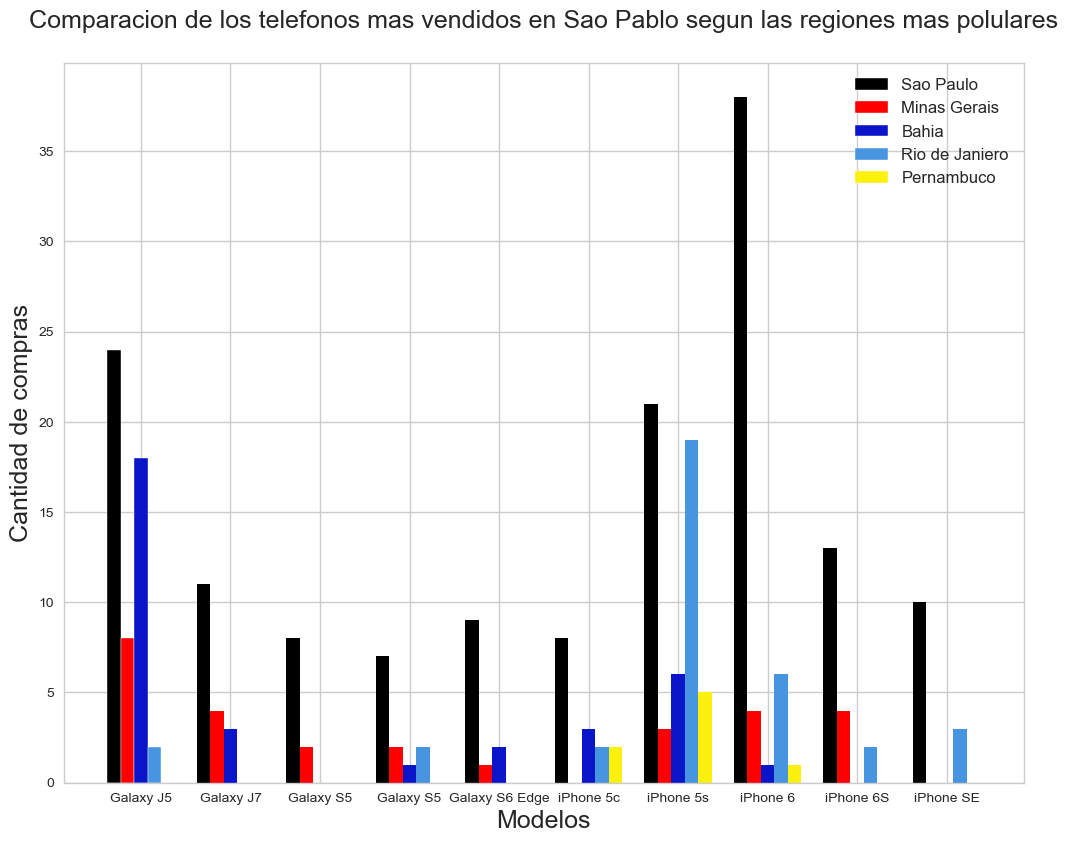

In [58]:
X = np.arange (len(lista))
Y1 = sao_paulo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio_de_janeiro.values
Y5 = pernambuco.values



plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Pernambuco", width = 0.15, align = "center",edgecolor = "white")

nombres = ['Galaxy J5', 'Galaxy J7', 'Galaxy S5', 'Galaxy S5', 'Galaxy S6 Edge', 'iPhone 5c', 'iPhone 5s', 'iPhone 6',
     'iPhone 6S', 'iPhone SE']

plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Modelos",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Comparacion de los telefonos mas vendidos en Sao Pablo segun las regiones mas polulares\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [20]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}

df_events = pd.read_csv("events.csv", low_memory=False)

In [21]:
users = df_events[["person","new_vs_returning","city","region","country","event","timestamp"]]
users = users.loc[users["new_vs_returning"].isnull() == False]
users["new_vs_returning"].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [5]:
#users = users.drop_duplicates(subset='person')
user = users["new_vs_returning"].value_counts()
user

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

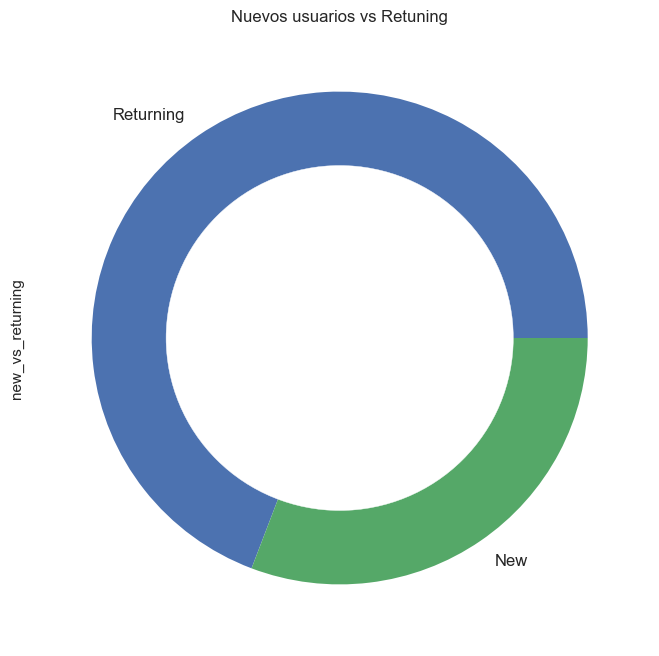

In [6]:
ax = user.plot(kind = 'pie', title = "Nuevos usuarios vs Retuning",figsize =(8,8),legend = False, fontsize = 12 )
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [7]:
users = users.loc[users["country"] != "Unknown"]
usersN = users.loc[users["new_vs_returning"] == "New"]
usersN = usersN["country"].value_counts().head(4)
usersR = users.loc[users["new_vs_returning"] == "Returning"]
usersR = usersR["country"].value_counts().head(4)
usersR

Brazil           58541
United States      168
Argentina           70
Canada              25
Name: country, dtype: int64

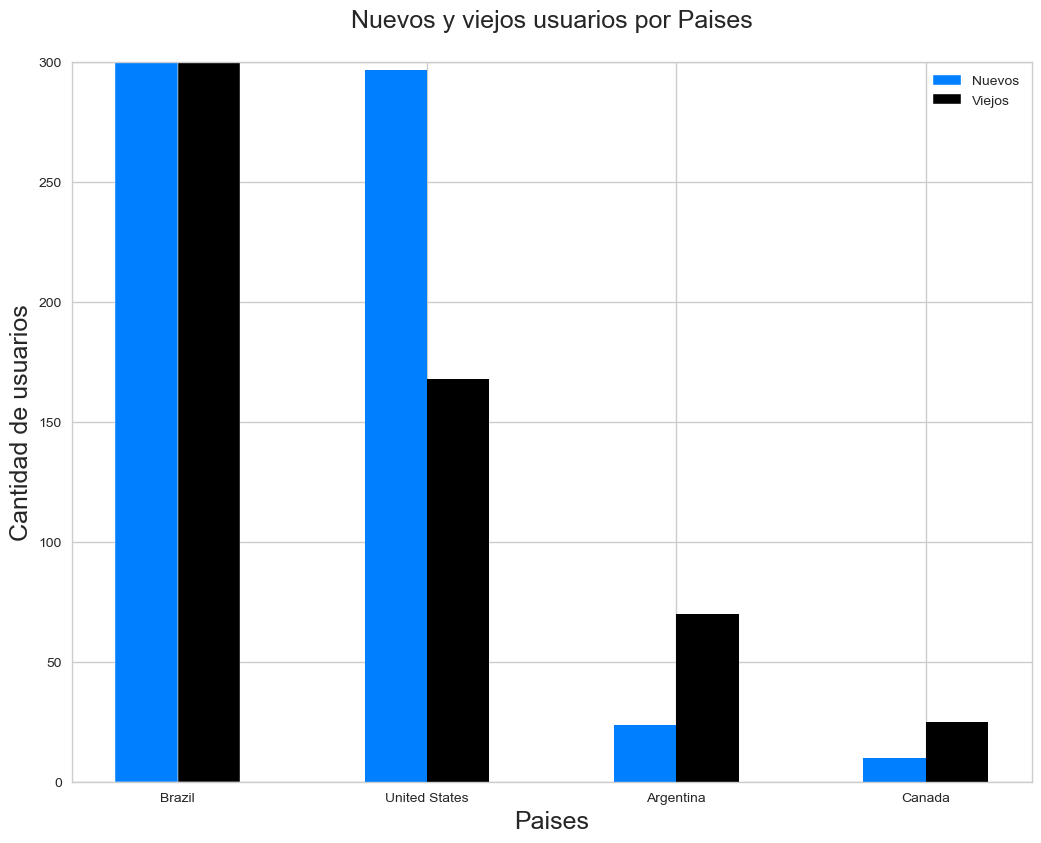

In [8]:
X = np.arange (len(usersN.index))
Y1 = usersN.values
Y2 = usersR.values


plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.125 ,Y1,facecolor = "#0080FF",label = "Nuevos", width = 0.25, align = "center",edgecolor = "white")
plt.bar(X+0.125,Y2,facecolor = "#000000",label = "Viejos", width = 0.25, align = "center",edgecolor = "white")

plt.ylim(0,300)
plt.xticks(X,usersN.index,fontsize = 10)
plt.xlabel("Paises",fontsize = 18)
plt.ylabel('Cantidad de usuarios', fontsize = 18)

plt.title('Nuevos y viejos usuarios por Paises\n', fontsize = 18)

plt.legend(loc="upper right")
plt.show()

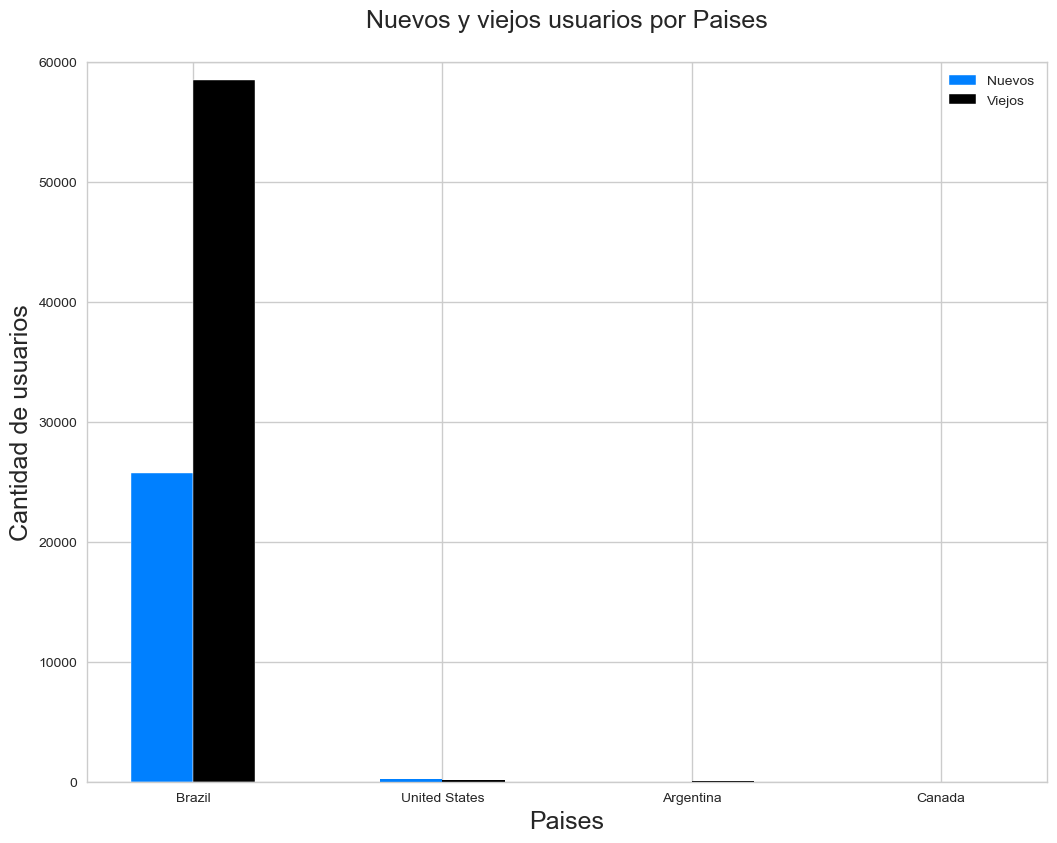

In [9]:
X = np.arange (len(usersN.index))
Y1 = usersN.values
Y2 = usersR.values


plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.125 ,Y1,facecolor = "#0080FF",label = "Nuevos", width = 0.25, align = "center",edgecolor = "white")
plt.bar(X+0.125,Y2,facecolor = "#000000",label = "Viejos", width = 0.25, align = "center",edgecolor = "white")

plt.ylim(0,60000)
plt.xticks(X,usersN.index,fontsize = 10)
plt.xlabel("Paises",fontsize = 18)
plt.ylabel('Cantidad de usuarios', fontsize = 18)

plt.title('Nuevos y viejos usuarios por Paises\n', fontsize = 18)

plt.legend(loc="upper right")
plt.show()

In [10]:
usersN = np.log(usersN)
usersR = np.log(usersR)

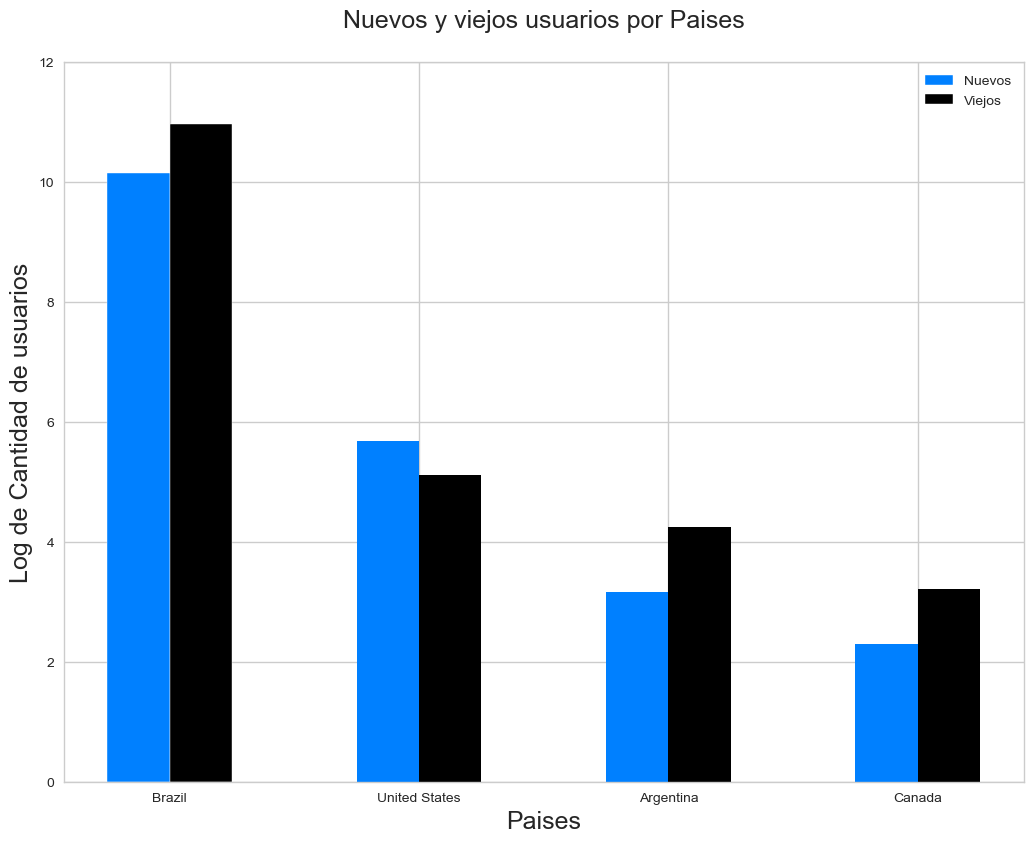

In [11]:
X = np.arange (len(usersN.index))
Y1 = usersN.values
Y2 = usersR.values


plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.125 ,Y1,facecolor = "#0080FF",label = "Nuevos", width = 0.25, align = "center",edgecolor = "white")
plt.bar(X+0.125,Y2,facecolor = "#000000",label = "Viejos", width = 0.25, align = "center",edgecolor = "white")

plt.ylim(0,12)
plt.xticks(X,usersN.index,fontsize = 10)
plt.xlabel("Paises",fontsize = 18)
plt.ylabel('Log de Cantidad de usuarios', fontsize = 18)

plt.title('Nuevos y viejos usuarios por Paises\n', fontsize = 18)

plt.legend(loc="upper right")
plt.show()


        

    
#g = sns.barplot(x = usersR.index, y = usersR.values, orient='v', palette=['red'], alpha=1)
#g = sns.barplot(x = usersN.index, y = usersN.values, orient='v', palette=['green'], alpha=0.5)
#g.legend(['Returning','New'],ncol=2, loc='upper right');
#g.set_title("Nuevos usuarios vs viejos usuarios", fontsize=18)
#g.set_xlabel("Paises",fontsize=18)
#g.set_ylabel("Log de Cantidad", fontsize=18)

#usersN



#plt.show()

#sns.countplot(x = usersN.index, y = usersN.values)
#sns.countplot(usersR)

#ax = userN.plot(kind = 'barh', title = "Nuevos usuarios por Paises",figsize =(15,10),legend = False, fontsize = 12 )
#ax.subplt(userR ,color ="r")
#ax.set_xlabel("Paises", fontsize = 18)
#ax.set_ylabel("Cantidad nuevos de usuarios",fontsize = 18)

In [12]:
#users = np.log(user)
#ax = user.plot(kind = 'barh', title = "Nuevos usuarios por Paises",figsize =(15,10),legend = False, fontsize = 12 )
#ax.set_xlabel("Paises", fontsize = 18)
#ax.set_ylabel("Log cantidad nuevos de usuarios",fontsize = 18)

In [13]:
usersB = users.loc[users["country"] == "Brazil"]
usersB = usersB.loc[users["region"] != "Unknown"]
userB = usersB["region"].value_counts().head(10)
userB

Sao Paulo            24996
Minas Gerais          7755
Rio de Janeiro        6913
Bahia                 5737
Pernambuco            2962
Ceara                 2829
Parana                2602
Rio Grande do Sul     2576
Federal District      1739
Goias                 1564
Name: region, dtype: int64

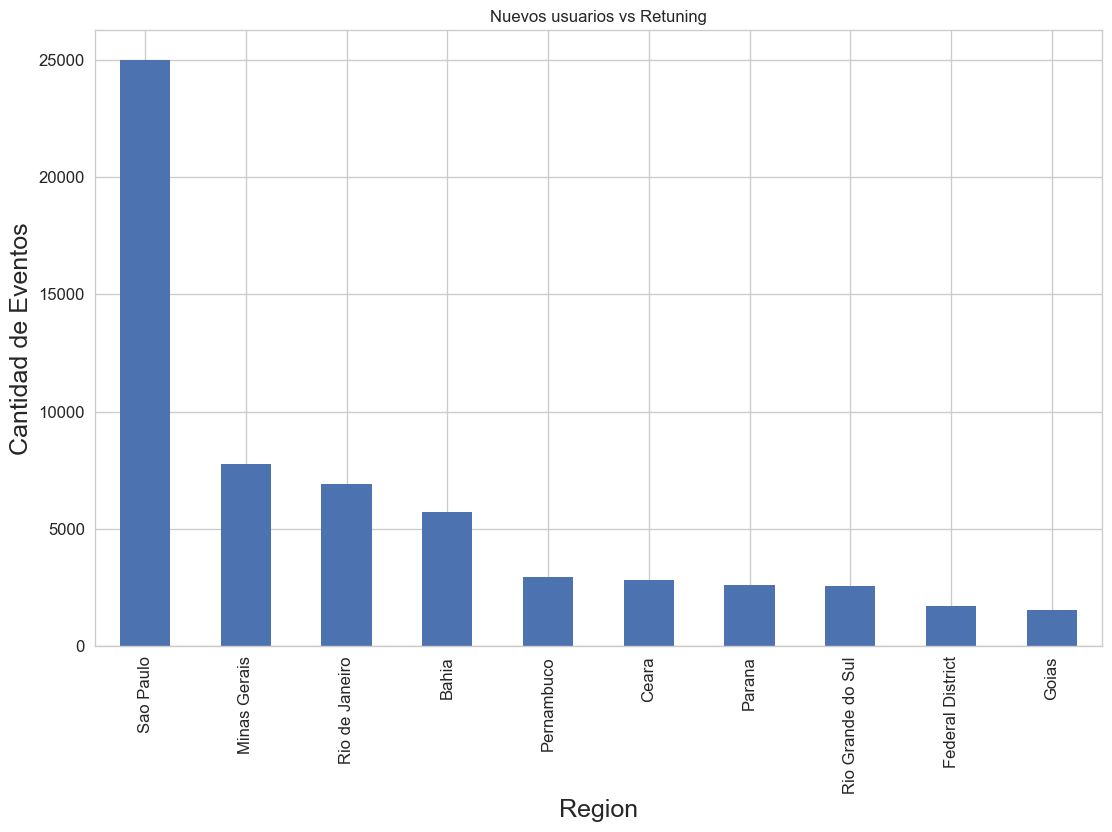

In [14]:
ax = userB.plot(kind = 'bar', title = "Nuevos usuarios vs Retuning",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Region", fontsize = 18)
ax.set_ylabel("Cantidad de Eventos",fontsize = 18)
plt.show()

In [15]:
users = users.loc[users["country"] == "Argentina"]
users = users.loc[users["region"] != "Unknown"]
usersA = users["region"].value_counts().head(10)
usersA

Buenos Aires F.D.    76
Buenos Aires          5
Cordoba               2
Santa Fe              1
Neuquen               1
Mendoza               1
Name: region, dtype: int64

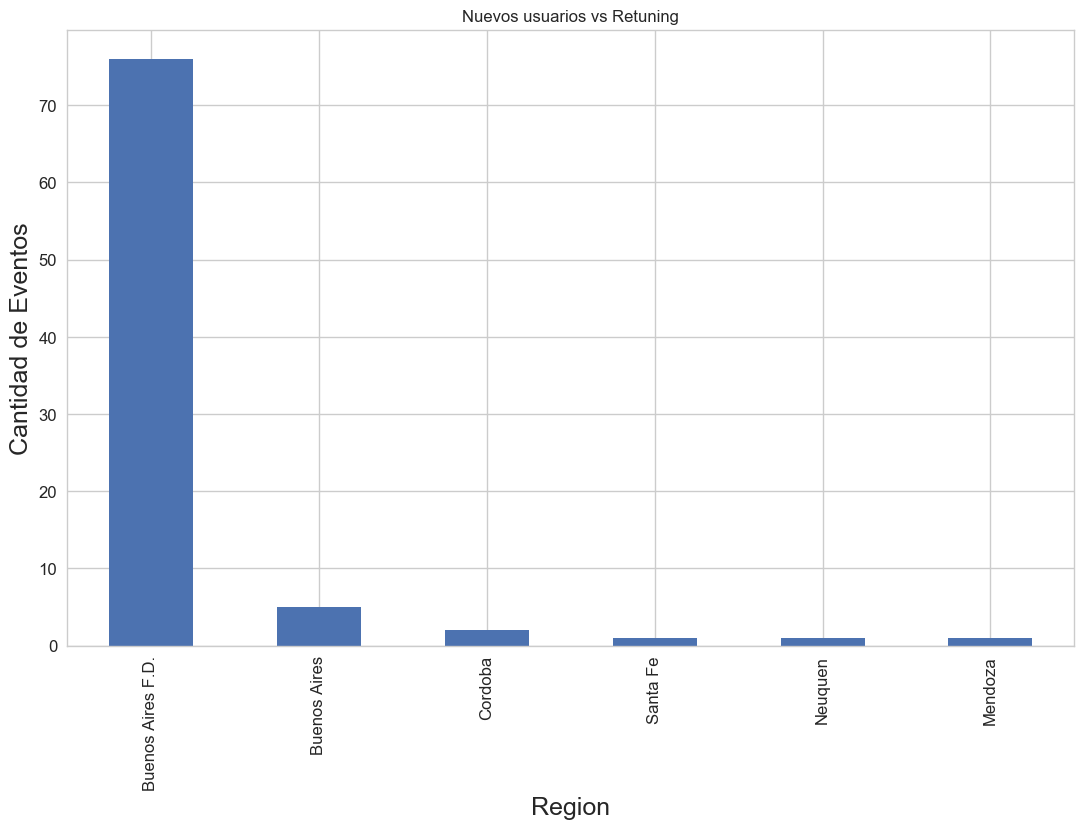

In [16]:
ax = usersA.plot(kind = 'bar', title = "Nuevos usuarios vs Retuning",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Region", fontsize = 18)
ax.set_ylabel("Cantidad de Eventos",fontsize = 18)
plt.show()

In [22]:
usersN = users.loc[users["new_vs_returning"] == "New"]
#usersN = usersN["person"]
#usersN["event"].value_counts()
usuarios_nuevos = usersN.drop_duplicates(subset='person')['person'].tolist()

_users = df_events.loc[(df_events['event'] == 'conversion') & (df_events['person'].isin(usuarios_nuevos))]
_users = _users[["person","model","condition"]]
#_users
_users_condition = _users["condition"].value_counts()
_users_model = _users["model"].value_counts().head(10)
_users_model

Samsung Galaxy J5         79
iPhone 5s                 75
iPhone 6                  69
Samsung Galaxy S6 Flat    36
iPhone 6S                 34
iPhone 5c                 31
Motorola Moto G3 4G       30
Motorola Moto G4 Plus     29
Samsung Galaxy J7         27
Samsung Galaxy A5         26
Name: model, dtype: int64

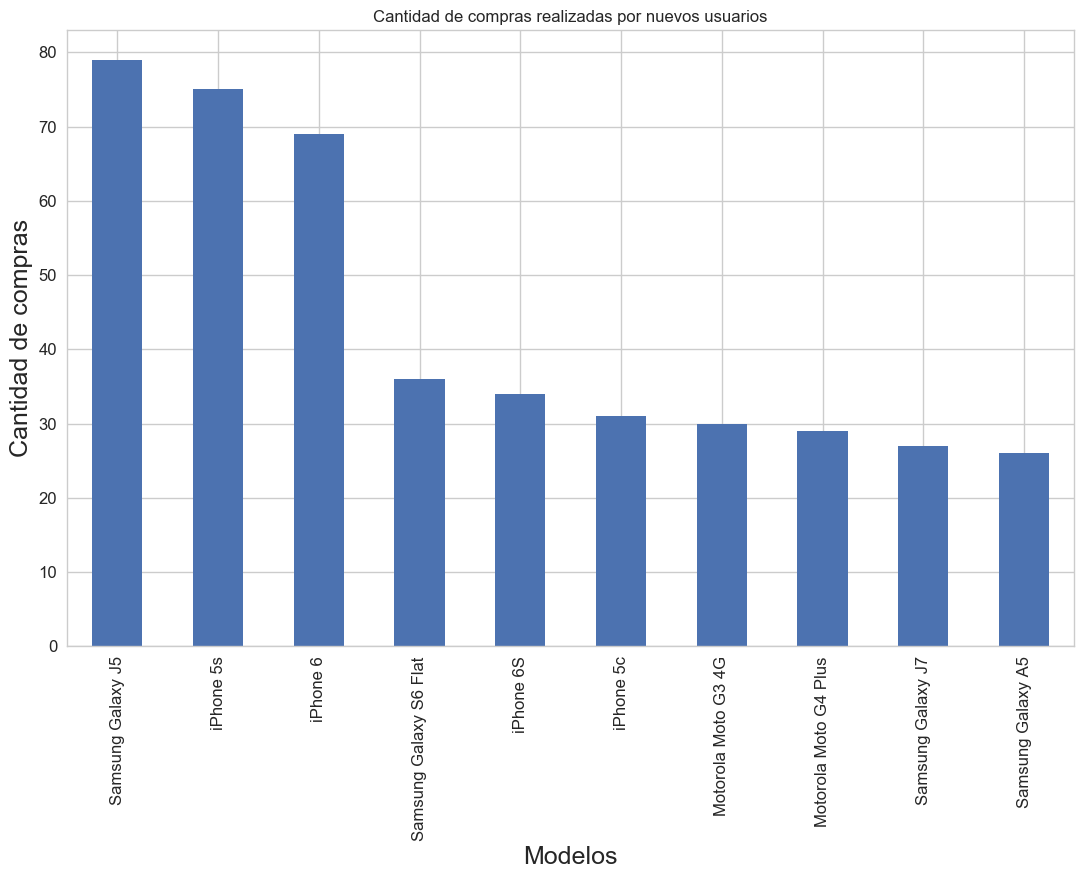

In [23]:
ax = _users_model.plot(kind = 'bar', title = "Cantidad de compras realizadas por nuevos usuarios",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Modelos", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
plt.show()

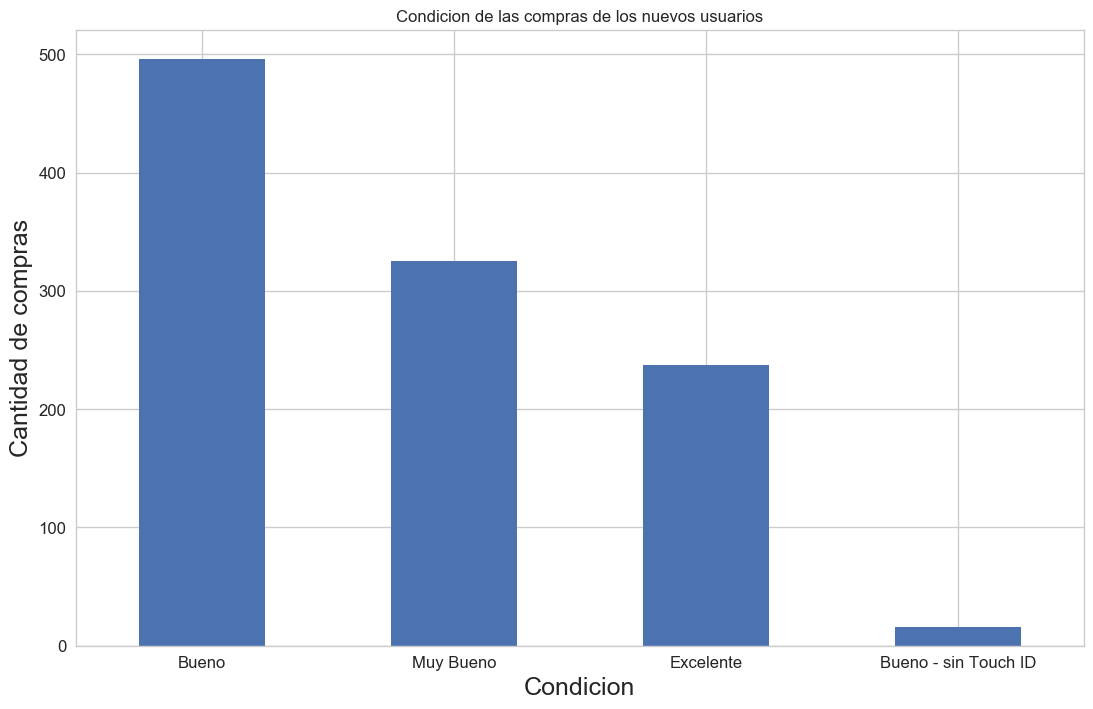

In [24]:
ax = _users_condition.plot(kind = 'bar', title = "Condicion de las compras de los nuevos usuarios",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Condicion", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
ax.set_xticklabels(["Bueno","Muy Bueno","Excelente","Bueno - sin Touch ID"],rotation = "horizontal")
plt.show()

usersR = users.loc[users["new_vs_returning"] == "Returning"]
#usersN = usersN["person"]
usersR["event"].value_counts()
usuarios_viejos = usersR.drop_duplicates(subset='person')['person'].tolist()

_users = df_events.loc[(df_events['event'] == 'conversion') & (df_events['person'].isin(usuarios_viejos))]
_users = _users[["person","model","condition"]]
_users
_users_condition = _users["condition"].value_counts()
_users_model = _users["model"].value_counts().head(10)
_users_model

ax = _users_model.plot(kind = 'bar', title = "Nuevos usuarios vs Retuning",figsize =(13,8),legend = False, fontsize = 12 )
ax.set_xlabel("Almacenamiento interno", fontsize = 18)
ax.set_ylabel("Cantidad de compras",fontsize = 18)
plt.show()

In [25]:
usersR = users.loc[users["new_vs_returning"] == "Returning"]
#usersR["event"].value_counts()
usuarios_viejos = usersR.drop_duplicates(subset='person')['person'].tolist()

_users = df_events.loc[(df_events['event'] == 'conversion') & (df_events['person'].isin(usuarios_viejos))]
_users = _users.loc[_users['person'].isin(usuarios_nuevos)]


_users = _users[["person","model","condition"]]
_users
_users_condition = _users["condition"].value_counts()
_users_model = _users["model"].value_counts().head(10)
_users_model

Samsung Galaxy J5         77
iPhone 5s                 71
iPhone 6                  59
Samsung Galaxy S6 Flat    34
iPhone 5c                 31
iPhone 6S                 30
Motorola Moto G3 4G       30
Motorola Moto G4 Plus     29
Samsung Galaxy A5         26
Samsung Galaxy J7         26
Name: model, dtype: int64

In [26]:
lista = []
repetidos = []
for usuario in usuarios_nuevos:
    if not usuario in usuarios_viejos:
        lista.append(usuario)
    else:
        repetidos.append(usuario)
        
repetidos

['000a54b2',
 '00184bf9',
 '001bb7eb',
 '00204059',
 '0024ad28',
 '00269e77',
 '0026fd72',
 '0027c344',
 '00283a9e',
 '002932b1',
 '00300ace',
 '003857f6',
 '003f561a',
 '003ff6cd',
 '00420f4e',
 '004bd8f4',
 '004e765d',
 '0060230e',
 '006193b0',
 '006aa565',
 '006ed26c',
 '006f0cb6',
 '0072367e',
 '00751747',
 '00783cae',
 '007f938f',
 '008179c7',
 '0084710f',
 '0085ed67',
 '008bf303',
 '0094cee0',
 '009696f0',
 '00aad450',
 '00b2ae27',
 '00bd2614',
 '00c13dee',
 '00d8b8e0',
 '00e018a6',
 '00e6402d',
 '00f6bcc5',
 '0100d49d',
 '0109a915',
 '010cfc29',
 '010f8821',
 '011072d0',
 '0112e074',
 '011350d6',
 '01139919',
 '01143386',
 '01161b55',
 '01231390',
 '0125424d',
 '0127e41c',
 '013641dd',
 '01413f3f',
 '0143ff29',
 '0144848e',
 '0146a9df',
 '014b5b0e',
 '014c3977',
 '014cf43f',
 '014e8fb1',
 '015f3528',
 '0164bbdb',
 '016d4e63',
 '0173c4cc',
 '0177c9cd',
 '0186338b',
 '01874a7c',
 '01950b37',
 '01957a3f',
 '019704d2',
 '019ac20f',
 '019edca3',
 '01a20d9a',
 '01a7a229',
 '01abb654',

In [2]:
import pandas as pd
import matplotlib as mlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np

mylist = []

for chunk in pd.read_csv('../../events.csv', low_memory=False, chunksize=20000):
    mylist.append(chunk)

df_events = pd.concat(mylist, axis= 0)
del mylist



In [3]:
df_events.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [4]:
df_events['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [5]:
# 1) Cantidad de visitas segun pais

df_1 = df_events[(df_events["event"]=="visited site") | (df_events["event"]=="ad campaign hit")]

In [6]:
df_1[df_1["event"]=="ad campaign hit"]["country"].value_counts()

## Esto lleva a no saber en qué paises conviene poner publicidad,
## dado que falta la información del pais para el evento "ad campaign hit"

## Si se tuviera esa información, se podría invertir más plata en publicidades
## para aquellos países que tienen un mayor ratio personas <-> publicidades clickeadas,
## o también visitas al sitio <-> publicidades clickeadas

Series([], Name: country, dtype: int64)

In [7]:
## 2) Publicidades más clickeadas

df_events[df_events["event"]=="ad campaign hit"]["url"].value_counts().head(6)

/                            28323
/comprar/iphone               4132
/comprar/iphone/6s            3393
/comprar/iphone/6             3228
/comprar/samsung              2782
/comprar/iphone/iphone-5s     2689
Name: url, dtype: int64

In [8]:
df_events[df_events["event"]=="ad campaign hit"].head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2018-04-09 20:12:31,ad campaign hit,000a54b2,/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2018-05-24 11:21:07,ad campaign hit,000a54b2,/,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,2018-05-17 00:08:56,ad campaign hit,0019c395,/comprar/samsung/galaxy-j5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
## Eventos vender
df_events["es_vender"] = df_events[df_events["event"]=="ad campaign hit"]["url"].str.contains("/vender")
df_vendiendo = df_events[df_events["es_vender"]==True]

## Personas vendiendo
df_vendiendo["person"].value_counts()

## Modelos a vender
df_vendiendo["url"].value_counts()

## Podemos ver que las url a las que llegaron los usuarios son de brasil, por lo que tal vez
## personas de otros países no esten queriendo/intentando/pudiendo vender (argentina no puede por ej.)

# Los modelos a vender son más viejos que los que se quieren comprar, no hay muchas ventas de modelos nuevos

/vender/                                      138
/vender/lg                                     22
/vender/motorola/moto-g5-plus                  19
/vender/motorola/moto-z2-play                  14
/vender/samsung/galaxy-s5                       8
/vender/motorola/moto-z2-force                  6
/vender/lg/lg-l80-dual                          4
/vender/samsung/galaxy-s8-plus                  3
/vender/motorola/moto-g5s-plus                  2
/vender/motorola/moto-e-2a-geracao-4g-dual      2
/vender                                         2
/vender/motorola                                1
Name: url, dtype: int64

In [18]:
# Eventos comprar
df_events["es_comprar"] = df_events[df_events["event"]=="ad campaign hit"]["url"].str.contains("/comprar")
df_comprando = df_events[df_events["es_comprar"]==True]

# Personas comprando
# df_comprando["person"].value_counts()

# Modelos a comprar
df_comprando["url"].value_counts().head(10)

## Vemos que las marcas que insinúan a la gente a clickear las publicidades son
## iphone, samsung y motorola (en orden)

/comprar/iphone                    4132
/comprar/iphone/6s                 3393
/comprar/iphone/6                  3228
/comprar/samsung                   2782
/comprar/iphone/iphone-5s          2689
/comprar/samsung/galaxy-j5         2446
/comprar/samsung/galaxy-s7-edge    1972
/comprar/samsung/galaxy-s8         1499
/comprar/samsung/galaxy-j7         1465
/comprar/samsung/galaxy-s6-edge    1415
Name: url, dtype: int64

In [19]:
# Los menos interesantes
df_comprando["url"].value_counts().tail(10)

/comprar/lg/lg-g4-stylus-hdtv-h540t         1
/comprar/lg/lg-g-pro-lite-dual-d685         1
/comprar/iphone/iphone-5/                   1
/comprar/lg/lg-g2-mini-d618-dual            1
/comprar/lg/lg-g2-mini-d618                 1
/comprar/samsung/galaxy-mega-duos           1
/comprar/samsung/galaxy-tab-e-96-wifi-3g    1
/comprar/ipad/ipad-mini-2-wi-fi             1
/comprar/motorola/moto-x                    1
/comprar/ipad/3-wi-fi-4g                    1
Name: url, dtype: int64

In [11]:
# 3) Checkout y conversion - Patrones segun usuarios

checkyconv_events = df_events[(df_events["event"]=="conversion") | (df_events["event"]=="checkout")]

persons_array = checkyconv_events["person"].value_counts().head(100).index.values

In [12]:
df_personas_checkyconv = df_events[df_events["person"].isin(persons_array)]

In [13]:
# El evento "visited site" es el unico que recopila informacion sobre el tipo de dispositivo
personas_smartphone = df_personas_checkyconv[df_personas_checkyconv["device_type"]=="Smartphone"]["person"].value_counts().index.values
personas_computer = df_personas_checkyconv[df_personas_checkyconv["device_type"]=="Computer"]["person"].value_counts().index.values

In [14]:
df_personas_smartphone = df_personas_checkyconv[df_personas_checkyconv["person"].isin(personas_smartphone)]
df_personas_smartphone[(df_personas_smartphone["event"]=="conversion")]["person"].value_counts().values.sum()

167

In [15]:
df_personas_computer = df_personas_checkyconv[df_personas_checkyconv["person"].isin(personas_computer)]
df_personas_computer[(df_personas_computer["event"]=="conversion")]["person"].value_counts().values.sum()

178

In [25]:
df_personas_computer.groupby("event").agg({"person": "count"})

,person
event,
ad campaign hit,1563
brand listing,4558
checkout,1010
conversion,178
generic listing,2455
lead,34
search engine hit,785
searched products,1409
staticpage,259


In [28]:
df_personas_smartphone.groupby("event").agg({"person": "count"})

,person
event,
ad campaign hit,1552
brand listing,2718
checkout,1015
conversion,167
generic listing,2291
lead,50
search engine hit,904
searched products,1439
staticpage,255


In [16]:
# 4) Click en publicidad - desde qué dispositivo
# Esta informacion tambien falta, no se puede saber desde que dispositivo se accedio a la publicidad
# Esto hace que se pierda informacion sobre donde poner publicidades, si conviene invertir mas en un diseño para mobile
# o si la gente no suele clickear publicidades desde sus celulares o tablets.
df_events[df_events["event"]=="ad campaign hit"]["device_type"].value_counts()

Series([], Name: device_type, dtype: int64)

In [21]:
# 5) Pais del que provienen los que clickean ads

persons_ads = df_events[df_events["event"]=="ad campaign hit"]["person"].value_counts().index.values


countries_ads = df_events[df_events["person"].isin(persons_ads)]["country"].value_counts().head(8).index.values
values_countries_ads = df_events[df_events["person"].isin(persons_ads)]["country"].value_counts().head(8).values
df_events[df_events["person"].isin(persons_ads)]["country"].value_counts().head(8)

Brazil            74529
Unknown            2120
United States       191
Argentina            67
Canada               28
Netherlands          11
United Kingdom       11
Japan                11
Name: country, dtype: int64

In [22]:
values_countries_total = df_events[df_events["country"].isin(countries_ads)]["country"].value_counts().values
df_events[df_events["country"].isin(countries_ads)]["country"].value_counts()

Brazil            84308
Unknown            2313
United States       465
Argentina            94
Canada               35
Netherlands          13
United Kingdom       12
Japan                11
Name: country, dtype: int64

In [23]:
ratio_total_ads = values_countries_total/values_countries_ads


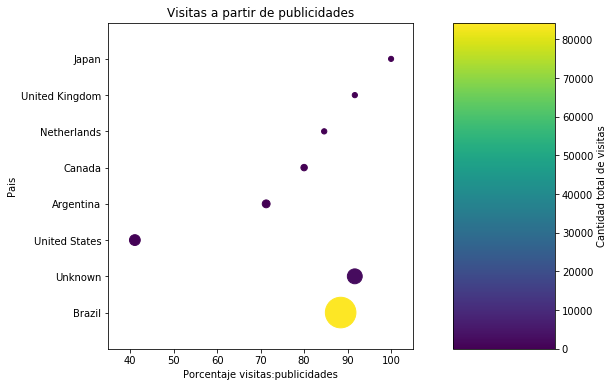

In [24]:
porcentaje_eventos = values_countries_total

cmap = mlib.cm.viridis
norm = mlib.colors.Normalize(vmin=0, vmax=84308)

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
# Dibuja los circulos segun la data de eventos, variando el radio segun el porcentaje 

plt.scatter(100/ratio_total_ads, countries_ads, s=(porcentaje_eventos)**(0.4)*10, c=cmap(norm(values_countries_total)))

# Agrega texto con el porcentaje representativo a cada evento
# plt.text(eventos[0]-25000, eventos.keys()[0], porcentaje_eventos[0].round(decimals=2).astype(str)+'%', color='white', weight=700)
# i=1
# for index, value in eventos[1:].iteritems():
#     plt.text(value+12000, index, porcentaje_eventos[i].round(2).astype(str)+'%')
#     i+=1

# Rotula y dibuja el gráfico
plt.xlabel('Porcentaje visitas:publicidades')
plt.ylabel('Pais')
plt.title('Visitas a partir de publicidades')
plt.axis([35, 105, -1, 8])


ax1 = plt.subplot(gs[1])
# Colorbar
ax = plt.gca()
cb1 = mlib.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('Cantidad total de visitas')

plt.show()

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv('./fiuba-trocafone-tp1-final-set/events.csv', dtype=types, low_memory=False)

In [3]:
df_events = df_events[["person",'timestamp','event','campaign_source','search_engine']]

In [4]:
df_events['is_new_session'] = np.where((df_events["event"] == "visited site"),True,False)

In [5]:
checkout_events = df_events.sort_values(by=['person','timestamp','is_new_session'], ascending=[True,True,False])\
        .loc[(df_events["event"] == "checkout") | (df_events["event"] == "ad campaign hit") \
             | (df_events["event"] == "visited site")]

In [6]:
session_id = (checkout_events["event"] == "visited site").cumsum()

checkout_events['session_id'] = session_id

In [7]:
checkouts_per_session = checkout_events[['event','session_id']].loc[(checkout_events["event"] == "checkout")]\
                    .groupby(['session_id'])\
                    .agg({'event' : 'count'})\
                    .rename(columns={'session_id' : 'session_id' , 'event' : 'checkouts_qty'})
checkouts_per_session

,checkouts_qty
session_id,
1,1
2,1
4,1
5,2
6,2
7,1
9,1
10,1
13,1


In [8]:
campaign_source_per_session = checkout_events[['event','session_id','campaign_source']]\
            .loc[(checkout_events["event"] == "ad campaign hit")].groupby(['session_id'])['campaign_source'].first()
campaign_source_per_session

session_id
1             criteo
2             criteo
3             google
4             google
7             google
9             google
10            criteo
12       FacebookAds
13             zanox
14            google
23            google
25            criteo
26            criteo
27            criteo
28            google
29            google
30          rtbhouse
32            google
34            google
35            google
36            google
37            criteo
38            google
39            google
41            google
43            google
44            google
45            google
46            google
47            google
            ...     
87337         google
87338         google
87339         google
87340         google
87341         google
87342         google
87349         google
87350         google
87351          zanox
87352         google
87353         google
87354         google
87355         google
87356         google
87357         google
87358         google
87

In [9]:
checkouts_and_campaign_source_per_session = pd.concat([checkout_events['session_id'],checkouts_per_session,campaign_source_per_session], axis=1)

In [10]:
checkouts_qty_per_campaign = checkouts_and_campaign_source_per_session\
                        .fillna(0)\
                        .groupby(['campaign_source','checkouts_qty'])\
                        .size()
checkouts_qty_per_campaign

campaign_source   checkouts_qty
0                 0.0              191824
                  1.0               10083
                  2.0                 541
                  3.0                 112
                  4.0                  37
                  5.0                  17
                  6.0                   6
                  7.0                   7
                  8.0                   2
                  9.0                   1
                  12.0                  1
                  14.0                  2
Facebook          0.0                  27
                  1.0                  20
                  2.0                   1
FacebookAds       0.0                 233
                  1.0                 257
                  2.0                  19
                  3.0                   2
                  4.0                   1
                  5.0                   1
FacebookSocial    0.0                   5
                  1.0                   2
MA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [3]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [4]:
models = df_events[["person","model","storage","event","color","condition"]]
models = models.loc[models["event"] == "conversion" ,:]

In [5]:
df = df_events.loc[(df_events["country"].isnull() == False) & (df_events["country"] != "Unknown"),:]
df = df[['person','country','region']]

df = df.drop_duplicates(subset='person')


#df2 = df[["person","region","country"]]

models = models.merge(df, on='person')

In [6]:
colores = {"Preto" : "Negro", "Dourado" : "Dorado", "Branco" : "Blanco", "Cinza espacial" : "Negro", "Prateado" : "Plata", "Ouro Rosa" : "Rosa",
"Rosa": "Rosa", "Cinza" : "Plata", "Azul" : "Azul", "Preto Vermelho" : "Negro", "Prata" : "Plata", "Platinum" : "Plata", "Preto Matte" : "Negro",
"Branco Vermelho" : "Blanco", "Ouro" : "Dorado", "Titânio" : "Plata", "Ametista" : "Otros", "Preto Brillhante" : "Negro", "Indigo" : "Otros",
"Amarelo" : "Otros", "Vermelho" : "Otros", "Bambu" : "Otros", "Cabernet" : "Otros", "Preto Azul" : "Negro", "Couro Vintage" : "Otros", "Azul Topázio" : "Azul"}

models["in_color"] = models['color'].apply(lambda x: colores.get(x, 'Basura'))

models = models.loc[models['in_color'] != 'Basura']
colores = models['in_color'].value_counts().sort_index()
colores

Azul       21
Blanco    210
Dorado    239
Negro     436
Otros      13
Plata      84
Rosa       51
Name: in_color, dtype: int64

In [7]:
brazil = models.loc[models["country"] == "Brazil"]
brazil = brazil.loc[brazil["region"] != "Unknown"]

top_5_regiones = brazil["region"].value_counts().head()

In [8]:
sao_pablo = brazil.loc[(brazil["region"] == "Sao Paulo")]
sao_pablo = sao_pablo["in_color"].value_counts().sort_index()
sao_pablo

Azul       5
Blanco    62
Dorado    71
Negro     93
Otros      3
Plata     40
Rosa      14
Name: in_color, dtype: int64

In [9]:
minas_gerais  = brazil.loc[brazil["region"] == "Minas Gerais"]

"""colores_f = pd.Series( [0,0,0,0,0,0,0],
    index = ["azul","Blanco","Dorado","Negro","Otros","Plata","Rosa")"""

        

minas_gerais = minas_gerais["in_color"].value_counts().sort_index()
minas_gerais

Azul       4
Blanco     9
Dorado    19
Negro     58
Otros      1
Plata      8
Rosa       5
Name: in_color, dtype: int64

In [10]:
rio  = brazil.loc[brazil["region"] == "Rio de Janeiro"]

colores_f = colores_f = pd.Series( [0],
    index = ["Otros"])
rio = rio["in_color"].value_counts()
rio = rio.append(colores_f) 

rio = rio.sort_index()
rio

Azul       1
Blanco     9
Dorado    24
Negro     50
Otros      0
Plata      4
Rosa       5
dtype: int64

In [11]:
maranhao  = brazil.loc[brazil["region"] == "Maranhao"]
maranhao = maranhao["in_color"].value_counts().sort_index()
maranhao 

Azul       1
Blanco    12
Dorado     6
Negro     15
Otros      2
Plata      2
Rosa       5
Name: in_color, dtype: int64

In [12]:
bahia  = brazil.loc[brazil["region"] == "Bahia"]

bahia = bahia["in_color"].value_counts()

colores_f = pd.Series( [0],
    index = ["Azul"])

bahia = bahia.append(colores_f)

bahia = bahia.sort_index()
bahia 

Azul       0
Blanco    20
Dorado    25
Negro     22
Otros      1
Plata      5
Rosa       4
dtype: int64

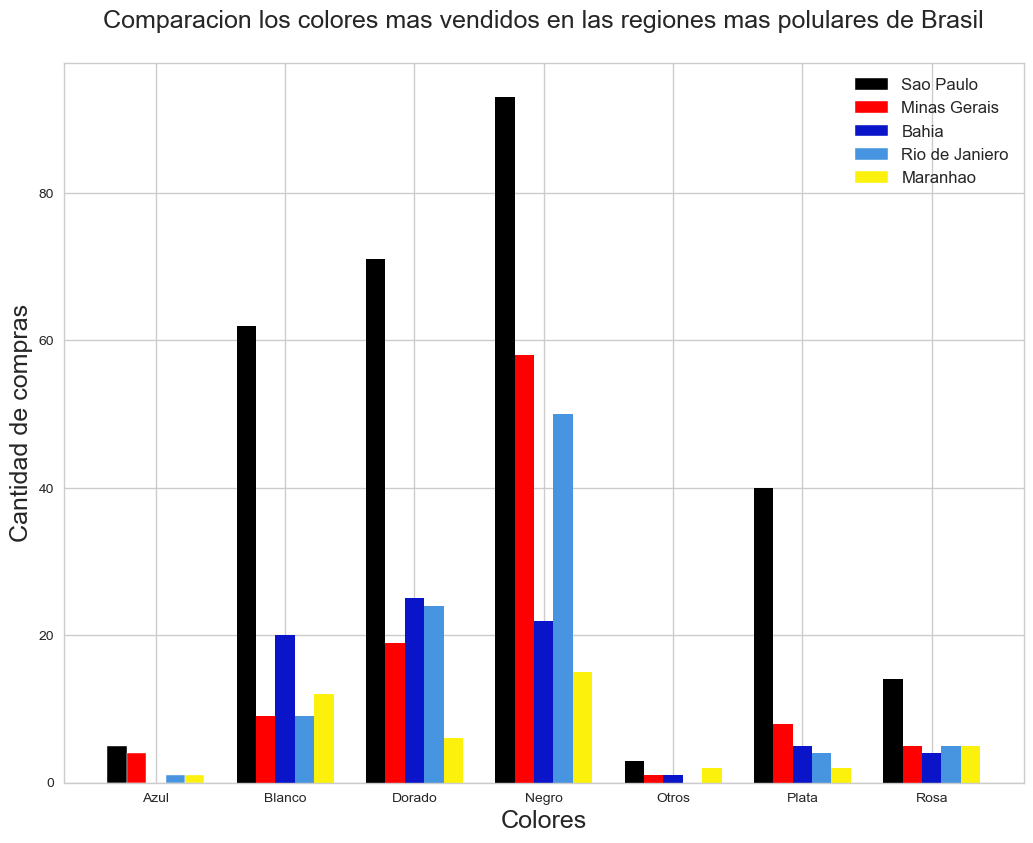

In [13]:
nombres = ["Azul","Blanco","Dorado","Negro","Otros","Plata","Rosa"]

X = np.arange (len(nombres))
Y1 = sao_pablo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio.values
Y5 = maranhao.values



plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Maranhao", width = 0.15, align = "center",edgecolor = "white")


plt.xticks(X,nombres,fontsize = 10)
plt.xlabel("Colores",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Comparacion los colores mas vendidos en las regiones mas polulares de Brasil\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [25]:
#compradores = df_events.loc[df_events["event"] == "conversion",:]
compradores = df_events[["person","model","event","country"]]
#compradores_ch = compradores.loc[compradores["event"] == "checkout"]
compradores_con = compradores.loc[compradores["event"] == "conversion"]
a = compradores_con["person"].value_counts().head(20).sort_index()
a
#compradores_ti = compradores_con.drop_duplicates(subset='person')['person'].tolist()
#compradores_ti

0ee60361     6
1072db20     6
19b38ba2     7
252adec6    15
2925e132     7
2a3a0a61     6
4200bdee    12
48d14aeb     7
6b07be7b     6
a0d4baef    11
a7713c81     7
a925072a     7
a96e304b     8
ba325a6b    10
baa40260     7
d12fbe38     8
d38f5851     6
e883f03a     7
f3a682fb     7
f646efa2     8
Name: person, dtype: int64

In [27]:
compradores_ch.count()
#usuarios_nuevos = compradores_ch.drop_duplicates(subset='person')['person'].tolist()

#compradores_ch = compradores.loc[(compradores['person'].isin(usuarios_nuevos))&(compradores["event"] == "checkout")]
compradores_ti = a.index.tolist()
compradores_cch = compradores.loc[(compradores['person'].isin(compradores_ti))&(compradores["event"] == "checkout")]

b = compradores_cch["person"].value_counts().head(20).sort_index()
b

0ee60361     1
1072db20    13
19b38ba2    23
252adec6     4
2925e132    14
2a3a0a61     7
4200bdee    11
48d14aeb    14
6b07be7b    13
a0d4baef    20
a7713c81     5
a925072a     9
a96e304b    13
ba325a6b     2
baa40260    13
d12fbe38     2
d38f5851    19
e883f03a     6
f3a682fb     9
f646efa2     8
Name: person, dtype: int64

In [11]:
"""a = compradores_con["person"].value_counts().sort_index().head(20)
a"""

00204059    1
00c13dee    1
00fdbb4b    1
0146a9df    1
01db2fe6    1
02a6f9b5    1
03bdcd81    1
042a2a99    1
04850add    1
04fbc241    1
0562e9d2    2
0585daeb    1
058d40c3    1
0624fb8e    1
06c1730a    1
06cbe382    1
0793fc28    2
079f4c7c    1
07cd981f    1
07ce78e5    1
Name: person, dtype: int64

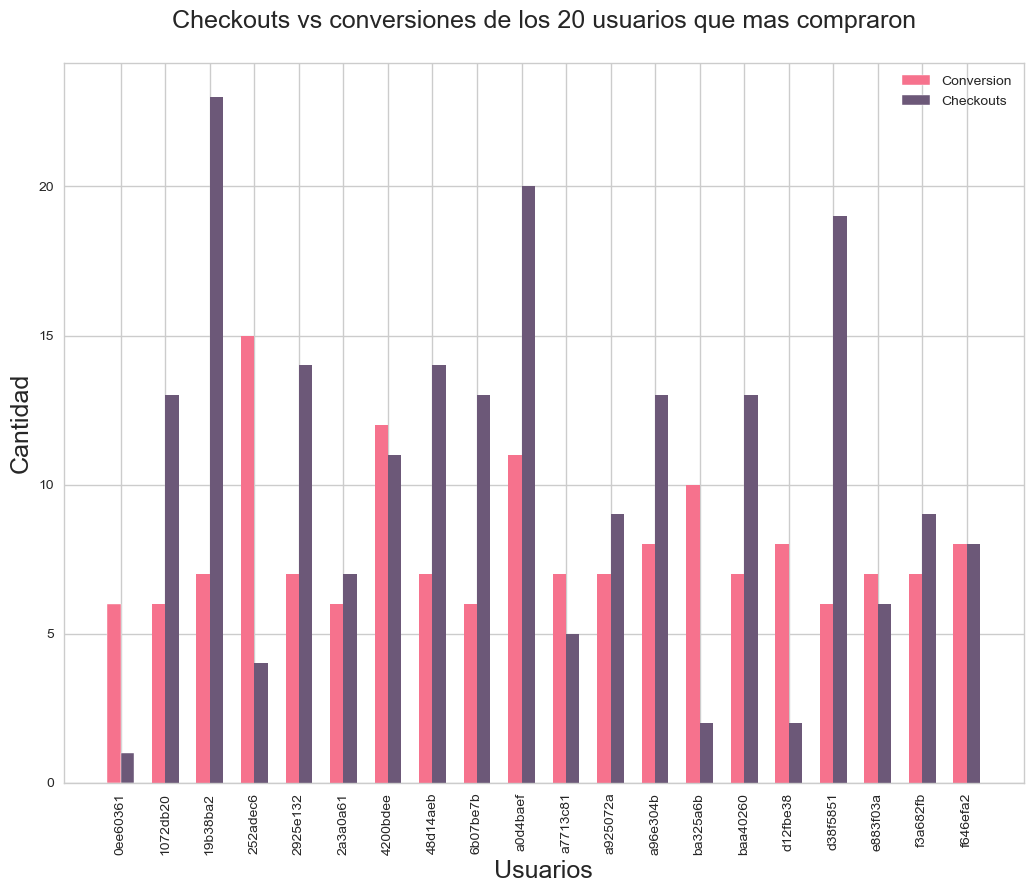

In [51]:
X = np.arange (len(compradores_ti))
Y1 = a.values
Y2 = b.values

plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.15 ,Y1,facecolor = "#F6728D",label = "Conversion", width = 0.3, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y2,facecolor = "#6C5878",label = "Checkouts", width = 0.3, align = "center",edgecolor = "white")


plt.xticks(X,compradores_ti,fontsize = 10,rotation='vertical')
plt.xlabel("Usuarios",fontsize = 18)
plt.ylabel('Cantidad', fontsize = 18)

plt.title('Checkouts vs conversiones de los 20 usuarios que mas compraron\n', fontsize = 18)

plt.legend(loc="upper right")
plt.show()

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv('./fiuba-trocafone-tp1-final-set/events.csv', dtype=types, low_memory=False)

In [3]:
df_events[['campaign_source','search_engine', 'device_type', 'new_vs_returning']].head(20)

,campaign_source,search_engine,device_type,new_vs_returning
0,criteo,NaN,NaN,NaN
1,NaN,NaN,Smartphone,New
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,Smartphone,New
6,criteo,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,Computer,New


In [5]:
users1 = df_events[["new_vs_returning", "person", "event", "campaign_source", "search_engine", "device_type"]]

In [6]:
users1["person"].value_counts()

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
d9251b63    1234
c501ff3a    1201
778fcfbd    1195
a7d3181e    1185
e2b0ce1b    1168
c38d5de3    1162
6d2fe2db    1110
88cabe99    1073
ba102035    1014
ff9dc4b8    1005
b7db0194    1003
a94ab0df     990
e27ec493     978
55d9fd71     973
8e0c69f6     958
63112254     955
d5661793     950
badaab79     930
3444791f     913
9fdfd942     907
            ... 
8f3d8825       1
c2929d24       1
9bbc8ca1       1
d043ee75       1
76046086       1
74068913       1
4dc43d43       1
2e16f052       1
cb9a1197       1
fdbe5136       1
e7eb9ac2       1
759683a2       1
f5cfcef8       1
09675dc1       1
f814cc35       1
ca5a2f18       1
f107a1a7       1
321d1f1d       1
ef8735af       1
6d87457e       1
d8f0019e       1
4da04c89       1
5c0ab066       1
fb454676       1
040cfd47       1
a20ecf2c       1
6d8a8a1f       1
9b427216      

In [7]:
users2 = users1.loc[(users1["event"] == "ad campaign hit") & (users1["campaign_source"] == "google")]

In [8]:
users2["person"].value_counts()

a202cfba    275
c013417a    210
e2b0ce1b    131
0b2bff0b    110
8fb99250    105
f3c1111e    105
875eb866     94
3952fd6f     94
5af7e2bc     94
4f50d6c5     91
8ade1780     86
95b58cd6     86
d9251b63     78
a1e1f8ec     75
14752aa3     73
1a959985     72
e32aadb9     67
cc4f129e     67
d85fbcc9     65
73eeb9a2     63
5d40cd8b     63
ba102035     62
3444791f     62
079290c6     62
ddd5ae61     62
0928c785     62
f67477ae     60
5dbdee43     59
778fcfbd     59
8059b958     58
           ... 
85e1287e      1
bb1912d0      1
bd3b2545      1
56c33c84      1
bebfbd88      1
959ec16b      1
689acc0d      1
2ac0c5ca      1
1d2e3564      1
2f8a1c76      1
b447e66a      1
784ac11b      1
af5615b0      1
e2c0188b      1
9ce19678      1
00344c0a      1
231eab40      1
ca0d7b24      1
fff60213      1
b106e0c9      1
54dbafde      1
11950bd9      1
ff2efe3e      1
7a8fd046      1
929eceae      1
ff0dc7e5      1
a66f2b2a      1
f57f5000      1
44a63195      1
ece4daeb      1
Name: person, Length: 17

In [9]:
#Cantidad de personas que visitan la pagina mediante una computadora
filter_col = df_events[[ "person", "event", "device_type"]]
filter_row = filter_col.loc[(filter_col["event"] == "visited site") & (filter_col["device_type"] == "Computer")]

In [10]:
filter_row

,person,event,device_type
9,000a54b2,visited site,Computer
16,000a54b2,visited site,Computer
45,00184bf9,visited site,Computer
87,00184bf9,visited site,Computer
106,001bb7eb,visited site,Computer
108,001bb7eb,visited site,Computer
116,00204059,visited site,Computer
118,00204059,visited site,Computer
127,00204059,visited site,Computer
144,00204059,visited site,Computer


In [11]:
#Cantidad de personas que visitan la pagina mediante un smartphone
filter_row = filter_col.loc[(filter_col["event"] == "visited site") ]
filter_row["device_type"].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [12]:
#filter_row.loc[(filter_row["device_type"] == "Unknown")]
filter_row

,person,event,device_type
1,0004b0a2,visited site,Smartphone
5,0006a21a,visited site,Smartphone
9,000a54b2,visited site,Computer
16,000a54b2,visited site,Computer
45,00184bf9,visited site,Computer
87,00184bf9,visited site,Computer
96,0019c395,visited site,Smartphone
106,001bb7eb,visited site,Computer
108,001bb7eb,visited site,Computer
112,001f1653,visited site,Smartphone


In [13]:
filter = (filter_row.loc[(filter_row["device_type"] != "Unknown")])["device_type"].value_counts()
#filter_row = filter_row["device_type"].value_counts()
filter

Smartphone    44239
Computer      41790
Tablet         1234
Name: device_type, dtype: int64

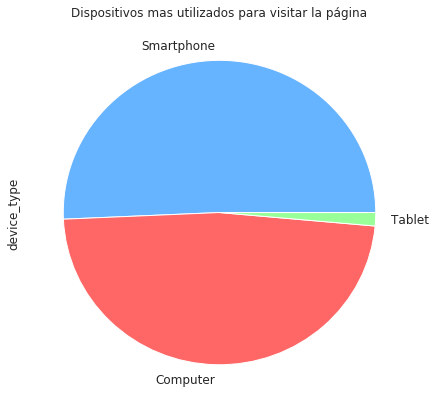

In [14]:
ax = filter.plot.pie(title = "Dispositivos mas utilizados para visitar la página", figsize =(7,7), colors = ['#66b3ff','#ff6666','#99ff99'], legend = False, fontsize = 12 )
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [7]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)
df_events = df_events[["person","device_type","screen_resolution","operating_system_version","browser_version"]]
df_events.count()

person                      1011288
device_type                   87378
screen_resolution             87378
operating_system_version      87378
browser_version               87378
dtype: int64

In [8]:
models = df_events.loc[(df_events["device_type"].isnull() == False) & (df_events["device_type"] != "Unknown"),:]
models = models.drop_duplicates(subset='person')
device = models["device_type"].value_counts()
device

Smartphone    14307
Computer      12074
Tablet          478
Name: device_type, dtype: int64

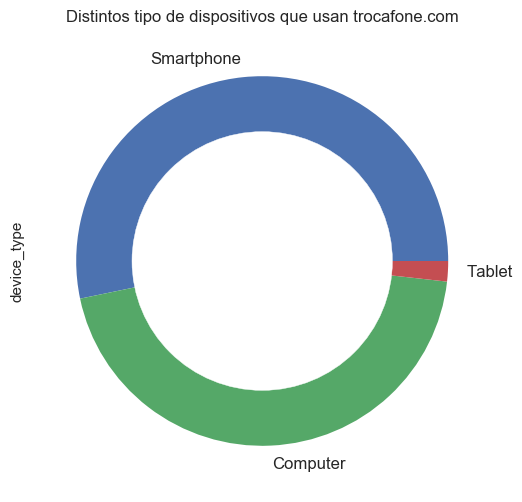

In [9]:
ax = device.plot(kind = 'pie', title = "Distintos tipo de dispositivos que usan trocafone.com",figsize =(6,6),legend = False, fontsize = 12)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

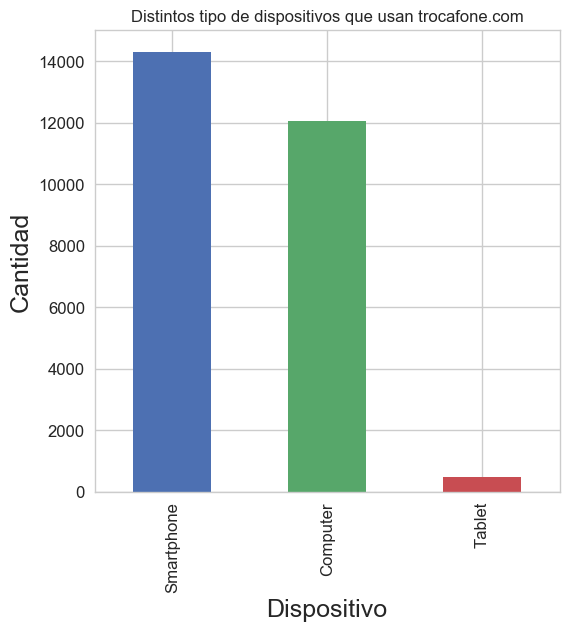

In [10]:
ax = device.plot(kind = 'bar', title = "Distintos tipo de dispositivos que usan trocafone.com",figsize =(6,6),legend = False, fontsize = 12,color =[["#4d70b2","#57a76a","#c84d52"]])
ax.set_xlabel("Dispositivo", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

In [11]:
celus = df_events.loc[df_events["device_type"] == "Smartphone",:]
celus = celus.drop_duplicates(subset='person')

celus["system_op"] = celus['operating_system_version'].apply(lambda x: x.split('.')[0])
celus
so_smart = celus["system_op"].value_counts().head(10)
so_smart

Android 6           5311
Android 7           4258
Android 5           2420
Android 4           1037
iOS 11               753
Android 8            308
iOS 10               228
iOS 9                 99
Windows Phone 8       69
Windows Phone 10      46
Name: system_op, dtype: int64

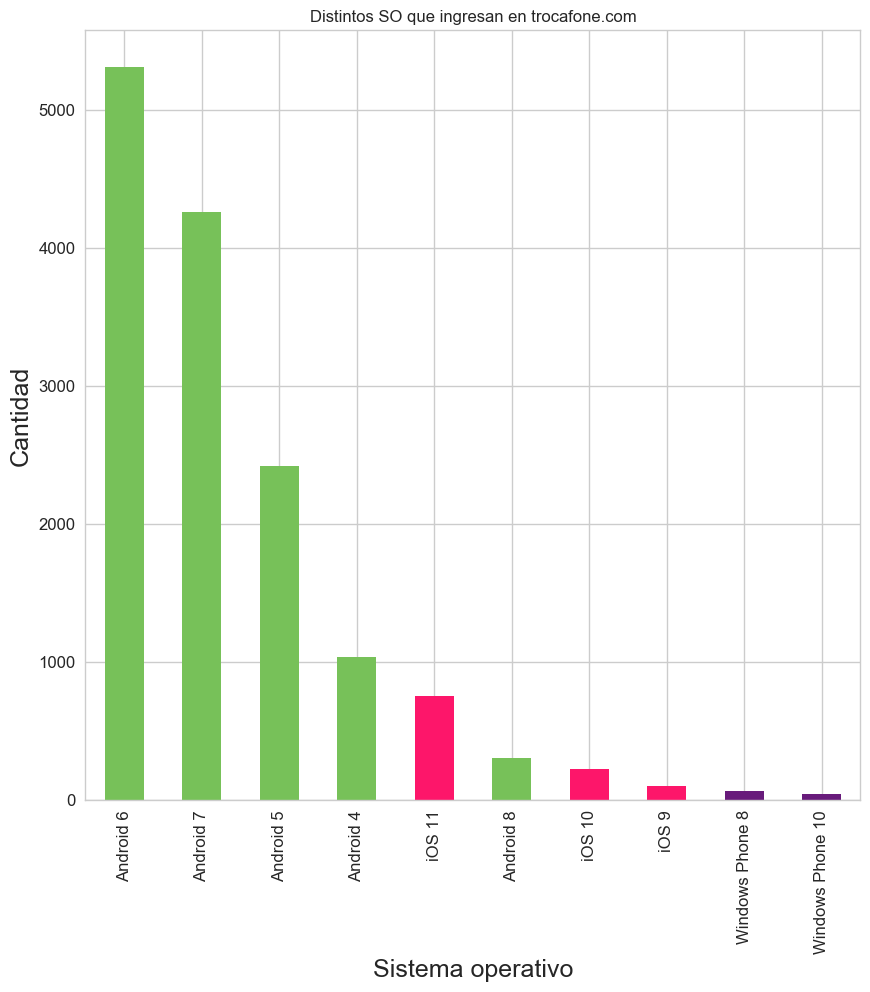

In [22]:
ax = so_smart.plot(kind = 'bar', title = "Distintos SO que ingresan en trocafone.com",figsize =(10,10),legend = False, fontsize = 12, color =[["#77C159","#77C159","#77C159","#77C159",'#FD166A',"#77C159",'#FD166A','#FD166A','#681B7B','#681B7B']])
ax.set_xlabel("Sistema operativo", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

In [13]:
compus = df_events.loc[df_events["device_type"] == "Computer",:]
compus = compus.drop_duplicates(subset='person')

#celus["system_op"] = celus['operating_system_version'].apply(lambda x: x.split('.')[0])
#celus
so_compus = compus["operating_system_version"].value_counts().head(10)
so_compus

Windows 7           6107
Windows 10          4685
Windows 8.1          915
Windows 8            194
Windows XP           168
Linux                130
Ubuntu                49
Mac OS X 10.13.4      45
Windows Vista         28
Mac OS X 10.12.6      14
Name: operating_system_version, dtype: int64

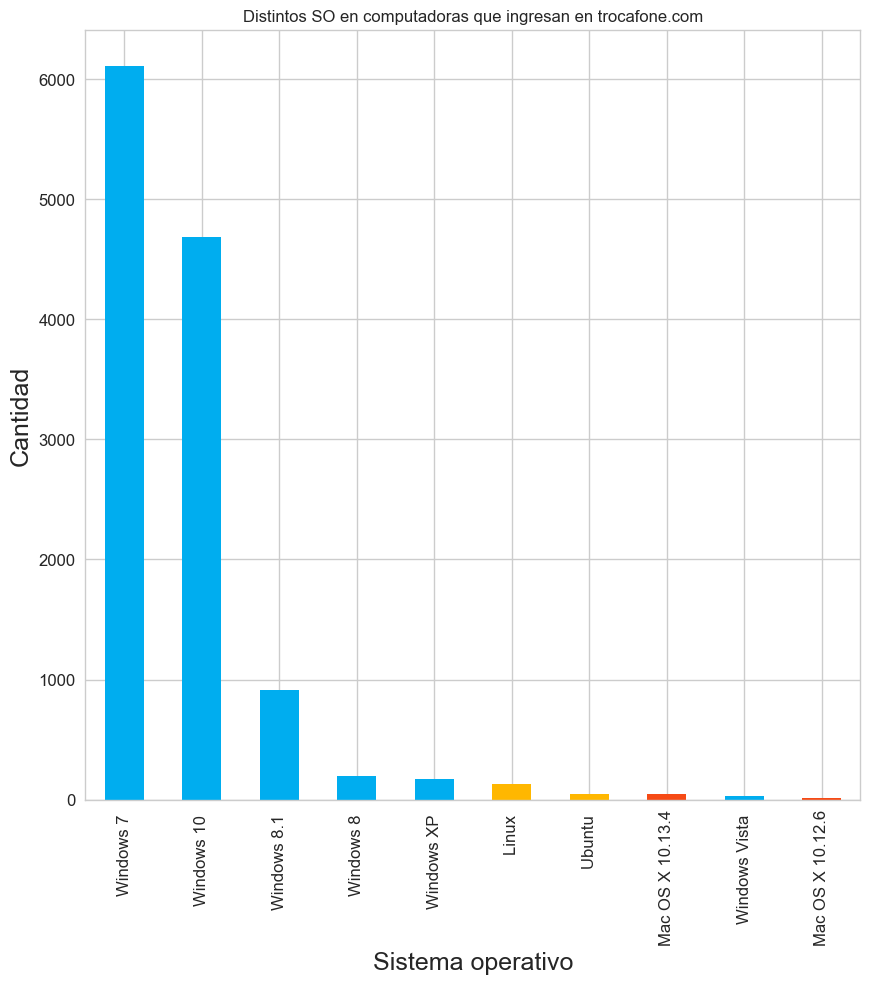

In [21]:
ax = so_compus.plot(kind = 'bar', title = "Distintos SO en computadoras que ingresan en trocafone.com",figsize =(10,10),legend = False, fontsize = 12,color = [["#00ADEF","#00ADEF","#00ADEF","#00ADEF","#00ADEF","#FFB700","#FFB700","#F64A15","#00ADEF","#F64A15"]])
ax.set_xlabel("Sistema operativo", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

In [28]:
resolucion_s = df_events.loc[df_events["device_type"] == "Smartphone",:]
resolucion_s = resolucion_s.drop_duplicates(subset='person')
resolucion_s = resolucion_s["screen_resolution"].value_counts().head(20)
resolucion_s

360x640      9111
320x534      1546
320x570      1243
320x568       577
375x667       321
412x732       244
424x753       229
320x480       228
320x569       155
414x736        89
480x800        69
320x427        69
640x360        57
720x1280       56
360x740        50
412x846        47
534x320        37
570x320        37
360x720        32
1080x1920      29
Name: screen_resolution, dtype: int64

In [38]:
resolucion_c = df_events.loc[df_events["device_type"] == "Computer",:]
resolucion_c = resolucion_c.drop_duplicates(subset='person')
resolucion_c = resolucion_c["screen_resolution"].value_counts().head(10)
resolucion_c

1366x768     6415
1920x1080     930
1024x768      816
1360x768      750
1600x900      749
1440x900      673
1280x1024     573
1280x800      288
1280x720      251
1536x864      247
Name: screen_resolution, dtype: int64

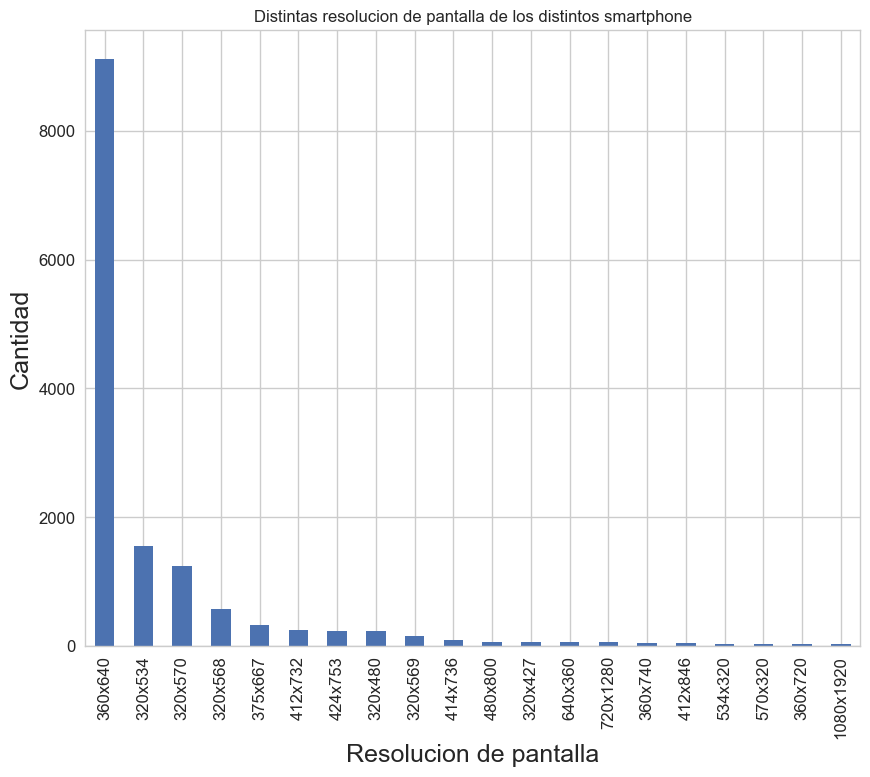

In [41]:
ax = resolucion_s.plot(kind = 'bar', title = "Distintas resolucion de pantalla de los distintos smartphone",figsize =(10,8),legend = False, fontsize = 12)
ax.set_xlabel("Resolucion de pantalla", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

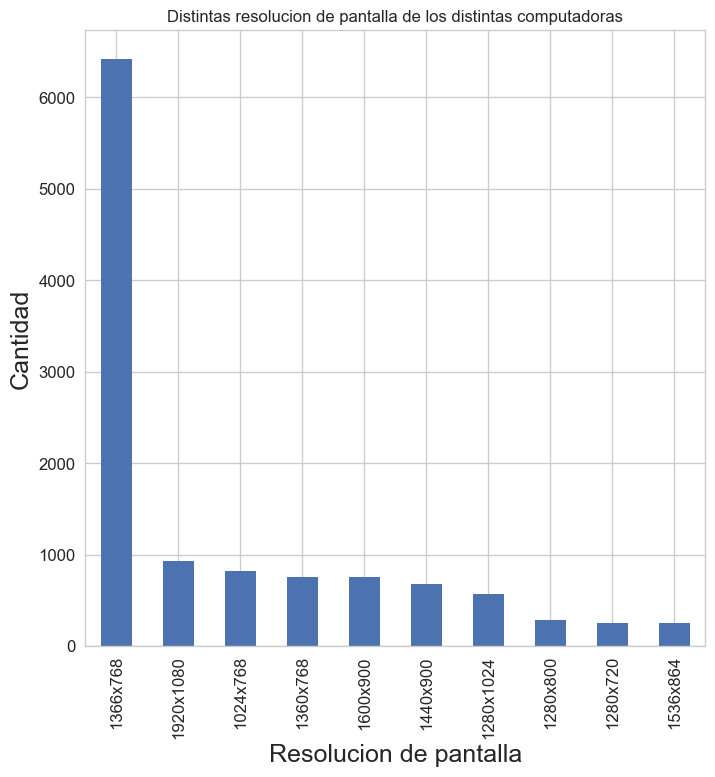

In [44]:
ax = resolucion_c.plot(kind = 'bar', title = "Distintas resolucion de pantalla de los distintas computadoras",figsize =(8,8),legend = False, fontsize = 12)
ax.set_xlabel("Resolucion de pantalla", fontsize = 18)
ax.set_ylabel("Cantidad",fontsize = 18)
plt.show()

In [15]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# TODO: ver que onda los warnings
import warnings
warnings.filterwarnings('ignore')


plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
def plot_heatmap(df, x, y, z, label_x='x', label_y='y', label_z='z', title='titulo', color='hot_r', invert_color=False):
    fig, ax = plt.subplots(figsize=(14,14))
    graph = sns.heatmap(df.pivot_table(index=y,columns=x,values=z),\
    linewidths=.5,cmap=color, ax=ax, cbar_kws={'label': label_z}, annot=False)
    ax.set_xlabel(label_x);
    ax.set_ylabel(label_y);
    ax.set_title(title)
    if invert_color:
        ax.invert_yaxis()

In [2]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category",
}
parse_dates = ['timestamp']
df_events = pd.read_csv('./fiuba-trocafone-tp1-final-set/events.csv', dtype=types, low_memory=False, parse_dates=parse_dates)

In [3]:
df_events['year'] = df_events['timestamp'].dt.year
df_events['month'] = df_events['timestamp'].dt.month
df_events['day'] = df_events['timestamp'].dt.day
df_events['time'] = df_events['timestamp'].dt.time

In [4]:
df_events.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'year', 'month', 'day',
       'time'],
      dtype='object')

#### Como hay solo 202 valores distintos, pero se contaron 564284 valores, lo tomo como un categorico

# Hora pico del uso de la pagina semanalmente.

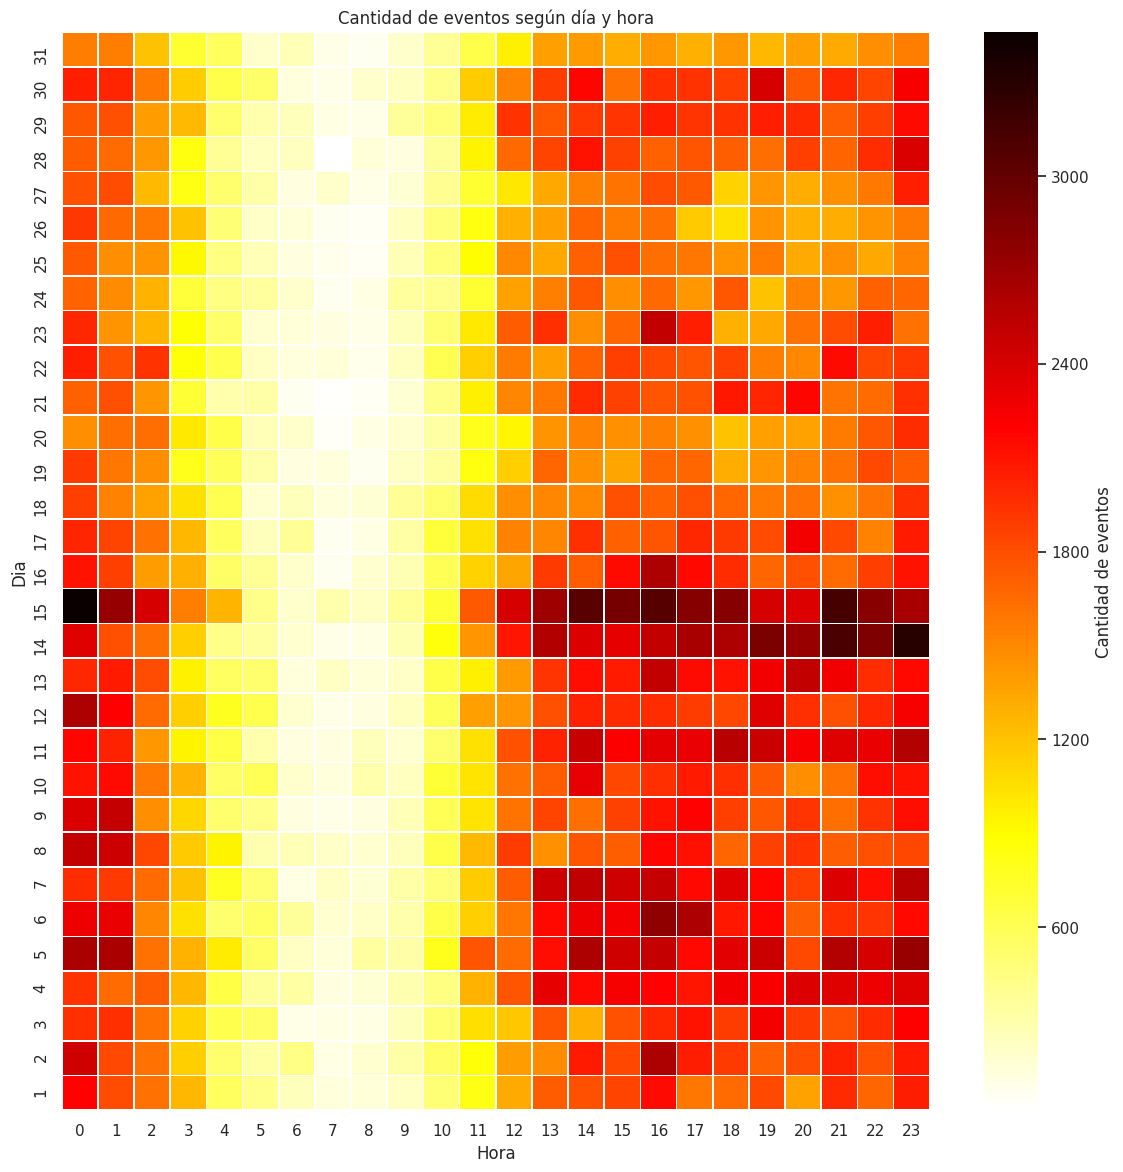

In [19]:
df_horaPico = df_events[['timestamp', 'day', 'event']]
df_horaPico['hour'] = df_horaPico['timestamp'].dt.hour
df_horaPico.drop('timestamp', axis='columns', inplace=True)
df_horaPico = df_horaPico.groupby(['hour', 'day']).agg({'day':'count'})
df_horaPico.columns = ['count']
df_horaPico.reset_index(inplace=True)
df_horaPico

plot_heatmap(df_horaPico,  x='hour', y='day', z='count', title='Cantidad de eventos según día y hora', label_x='Hora',label_y='Dia',label_z='Cantidad de eventos',invert_color=True)

In [6]:
df_horaPico = df_events[['timestamp', 'day', 'event']]
df_horaPico['hour'] = df_horaPico['timestamp'].dt.hour
df_horaPico.drop('timestamp', axis='columns', inplace=True)

In [7]:
df_conversions = df_horaPico[df_horaPico['event']=='conversion']
conversions_ser = df_conversions.groupby('hour').agg({'event': 'count'})
conversions_ser.reset_index(inplace=True)
conversions_ser.columns = ['hour', 'count']

df_viewed = df_horaPico[df_horaPico['event']=='viewed product']
viewed_ser = df_viewed.groupby('hour').agg({'event': 'count'})
viewed_ser.reset_index(inplace=True)
viewed_ser.columns = ['hour','count']

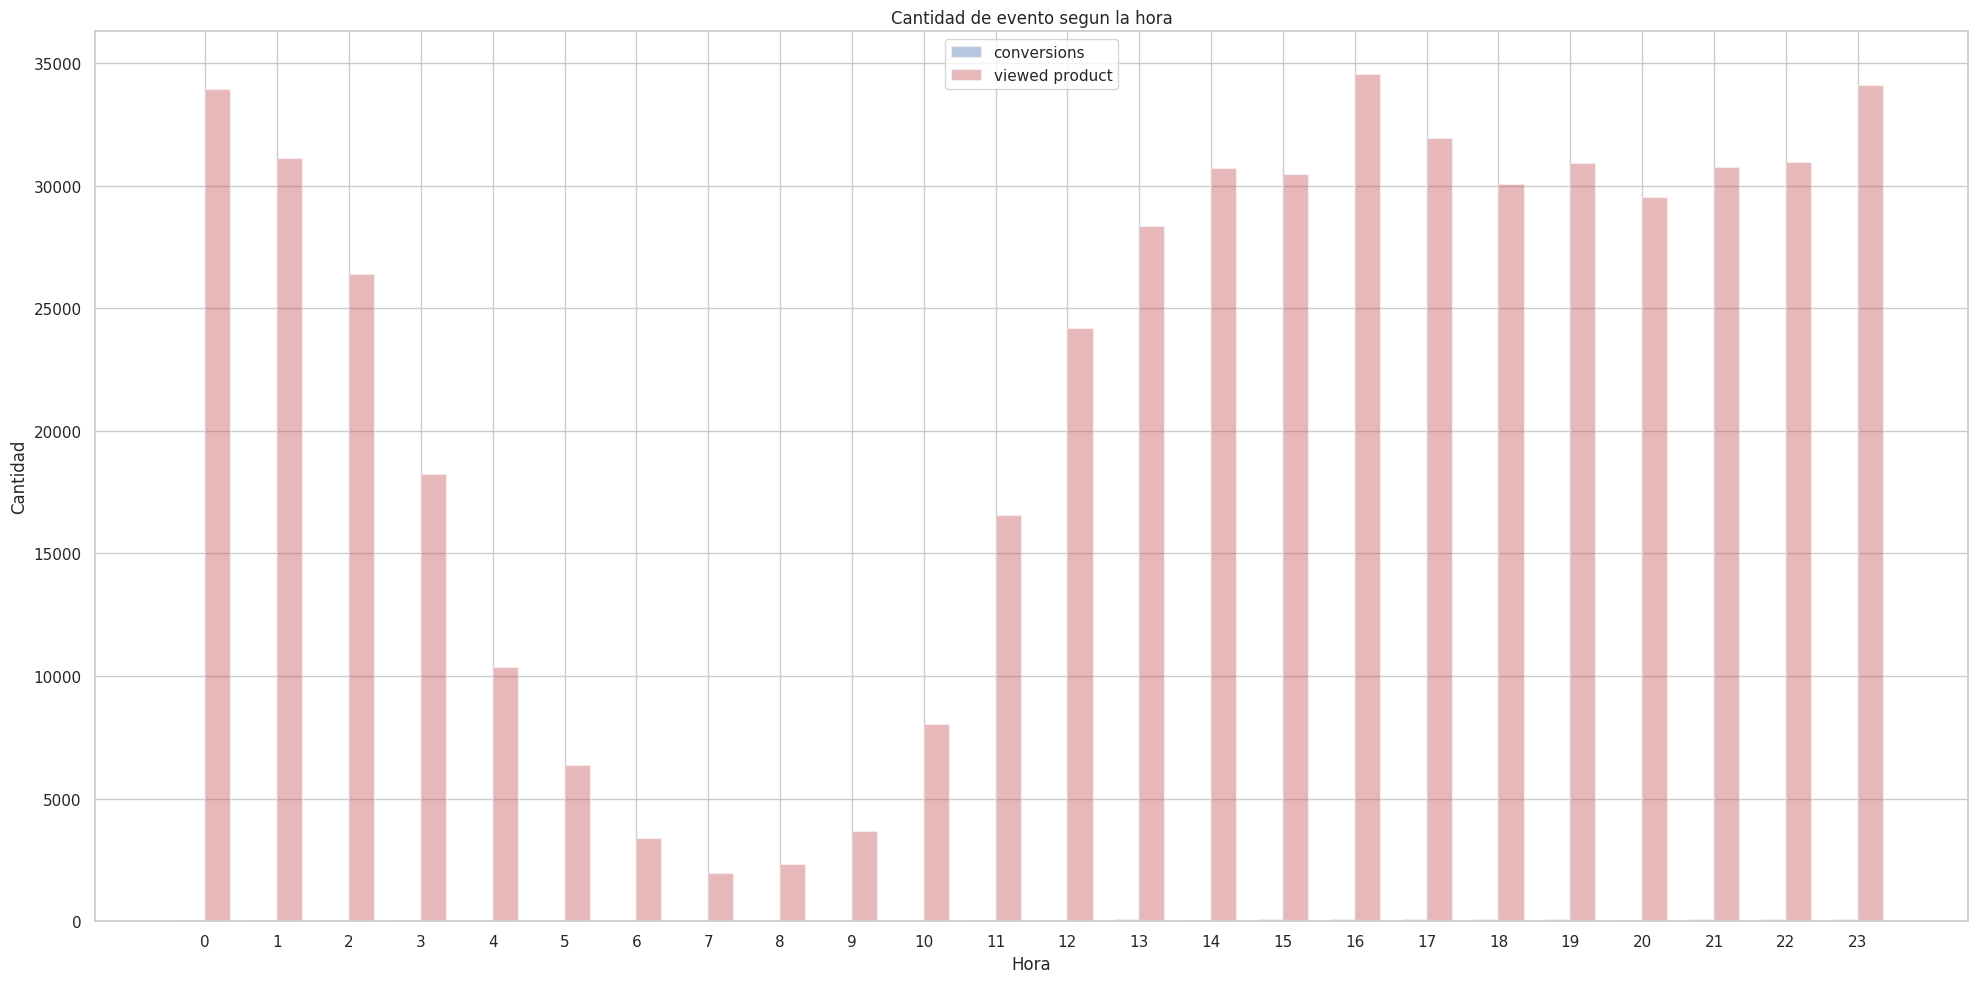

In [16]:
index = viewed_ser['hour'].values

fig, ax = plt.subplots()
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, conversions_ser['count'].values, bar_width,
                alpha=opacity, color='b',
                label='conversions')

rects2 = ax.bar(index + bar_width, viewed_ser['count'].values, bar_width,
                alpha=opacity, color='r',
                label='viewed product')

ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de evento segun la hora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

fig.tight_layout()
plt.show()

In [9]:
k = (viewed_ser['count']/conversions_ser['count']).mean()

## La relacion entre visitas y compras es de 15.54 en promedio

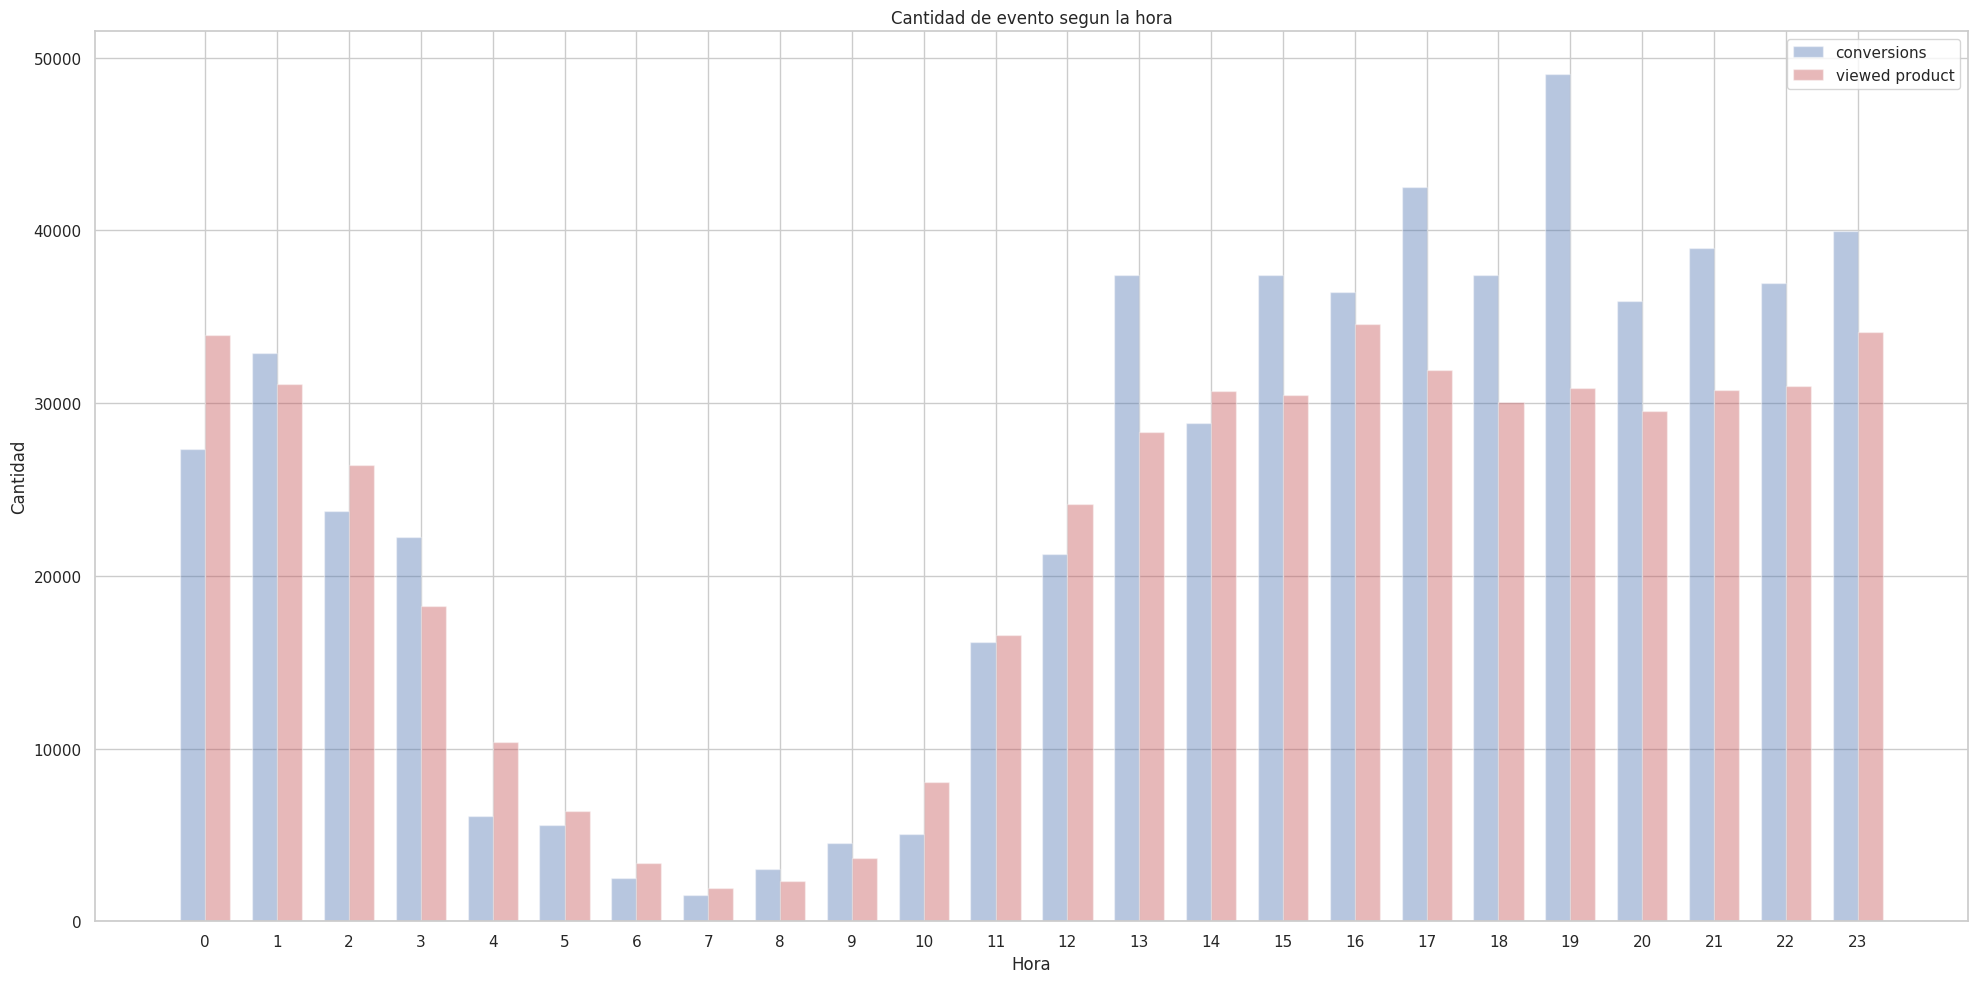

In [17]:
index = viewed_ser['hour'].values

fig, ax = plt.subplots()
bar_width = 0.35

opacity = 0.4

rects1 = ax.bar(index, conversions_ser['count'].values * k, bar_width,
                alpha=opacity, color='b',
                label='conversions')

rects2 = ax.bar(index + bar_width, viewed_ser['count'].values, bar_width,
                alpha=opacity, color='r',
                label='viewed product')

ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad de evento segun la hora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

fig.tight_layout()
plt.show()

## Busqueda de compradores mayoristas

In [11]:
df_mayoristas = df_events[df_events['event'] == 'conversion']['person'].value_counts()
df_mayoristas.head(10)

252adec6    15
4200bdee    12
a0d4baef    11
ba325a6b    10
f646efa2     8
d12fbe38     8
a96e304b     8
e883f03a     7
baa40260     7
a7713c81     7
Name: person, dtype: int64

In [12]:
adicto = df_events[(df_events['person'] == '252adec6') & (df_events['event'] == 'conversion')]
[
    adicto['timestamp'].max()-
    adicto['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto['timestamp'];


In [13]:
adicto2 = df_events[(df_events['person'] == '4200bdee') & (df_events['event'] == 'conversion')]
[
    adicto2['timestamp'].max()-
    adicto2['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto2['timestamp'];

In [14]:
adicto3 = df_events[(df_events['person'] == 'a0d4baef') & (df_events['event'] == 'conversion')]
[
    adicto3['timestamp'].max()-
    adicto3['timestamp'].min(),
    df_events['timestamp'].min(),
    df_events['timestamp'].max(),
]
adicto3['timestamp'];

In [254]:
# Ver como mostrar adicto, adicto2, adicto3
# Un grafico cada uno?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [31]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [32]:
models = df_events[["person","model","storage","event","color","condition"]]
models = models.loc[models["event"] == "conversion" ,:]

In [33]:
df = df_events.loc[(df_events["country"].isnull() == False) & (df_events["country"] != "Unknown"),:]
df = df[['person','country','region']]

df = df.drop_duplicates(subset='person')


#df2 = df[["person","region","country"]]

models = models.merge(df, on='person')

In [47]:
brazil = models.loc[models["country"] == "Brazil"]
brazil = brazil.loc[brazil["region"] != "Unknown"]

#top = brazil["region"].value_counts()

top_10_t = brazil["model"].value_counts().head(10)
top_10 = top_10_t.index.tolist()
top_10.sort()
top_10

['Motorola Moto G3 4G',
 'Motorola Moto G4 Plus',
 'Samsung Galaxy Gran Prime Duos TV',
 'Samsung Galaxy J5',
 'Samsung Galaxy J7',
 'Samsung Galaxy S6 Flat',
 'iPhone 5c',
 'iPhone 5s',
 'iPhone 6',
 'iPhone 6S']

In [71]:

sao_pablo = brazil.loc[(brazil["region"] == "Sao Paulo")&(brazil["model"].isin(top_10))]
sao_pablo = sao_pablo["model"].value_counts().head(10).sort_index()

modelos_f = pd.Series( [0,0,0,0,0,0,0,0,0,0],
    index = ['Motorola Moto G3 4G', 'Motorola Moto G4 Plus','Samsung Galaxy Gran Prime Duos TV', 'Samsung Galaxy J5','Samsung Galaxy J7','Samsung Galaxy S6 Flat',
 'iPhone 5c','iPhone 5s','iPhone 6','iPhone 6S'])



In [72]:
minas_gerais = brazil.loc[(brazil["region"] == "Minas Gerais")&(brazil["model"].isin(top_10))]

minas_gerais = minas_gerais["model"].value_counts().head(9)

modelos_f = pd.Series( [0], index = ['iPhone 5c'])

minas_gerais = minas_gerais.append(modelos_f)

minas_gerais = minas_gerais.sort_index()
minas_gerais

Motorola Moto G3 4G                  9
Motorola Moto G4 Plus                6
Samsung Galaxy Gran Prime Duos TV    5
Samsung Galaxy J5                    9
Samsung Galaxy J7                    4
Samsung Galaxy S6 Flat               3
iPhone 5c                            0
iPhone 5s                            3
iPhone 6                             4
iPhone 6S                            4
dtype: int64

In [73]:
rio = brazil.loc[(brazil["region"] == "Rio de Janeiro")&(brazil["model"].isin(top_10))]
rio = rio["model"].value_counts().head(7)

modelos_f = pd.Series( [0,0,0], index = ['Motorola Moto G3 4G','Samsung Galaxy Gran Prime Duos TV','Samsung Galaxy J7'])

rio = rio.append(modelos_f)
rio = rio.sort_index()

rio

Motorola Moto G3 4G                   0
Motorola Moto G4 Plus                 1
Samsung Galaxy Gran Prime Duos TV     0
Samsung Galaxy J5                     2
Samsung Galaxy J7                     0
Samsung Galaxy S6 Flat               11
iPhone 5c                             2
iPhone 5s                            15
iPhone 6                              6
iPhone 6S                             2
dtype: int64

In [74]:
bahia = brazil.loc[(brazil["region"] == "Bahia")&(brazil["model"].isin(top_10))]
bahia = bahia["model"].value_counts().head(8)

modelos_f = pd.Series( [0,0], index = ['Samsung Galaxy S6 Flat','iPhone 6S'])

bahia = bahia.append(modelos_f)
bahia = bahia.sort_index()

bahia


Motorola Moto G3 4G                   4
Motorola Moto G4 Plus                 2
Samsung Galaxy Gran Prime Duos TV     2
Samsung Galaxy J5                    17
Samsung Galaxy J7                     1
Samsung Galaxy S6 Flat                0
iPhone 5c                             3
iPhone 5s                             5
iPhone 6                              1
iPhone 6S                             0
dtype: int64

In [75]:
maranhao = brazil.loc[(brazil["region"] == "Maranhao")&(brazil["model"].isin(top_10))]
maranhao = maranhao["model"].value_counts().head(4)

modelos_f = pd.Series( [0,0,0,0,0,0],
    index = [ 'Motorola Moto G4 Plus','Samsung Galaxy Gran Prime Duos TV', 'Samsung Galaxy J5','Samsung Galaxy J7',
 'iPhone 5c','iPhone 6'])

maranhao = maranhao.append(modelos_f)
maranhao = maranhao.sort_index()

maranhao


Motorola Moto G3 4G                  1
Motorola Moto G4 Plus                0
Samsung Galaxy Gran Prime Duos TV    0
Samsung Galaxy J5                    0
Samsung Galaxy J7                    0
Samsung Galaxy S6 Flat               9
iPhone 5c                            0
iPhone 5s                            2
iPhone 6                             0
iPhone 6S                            3
dtype: int64

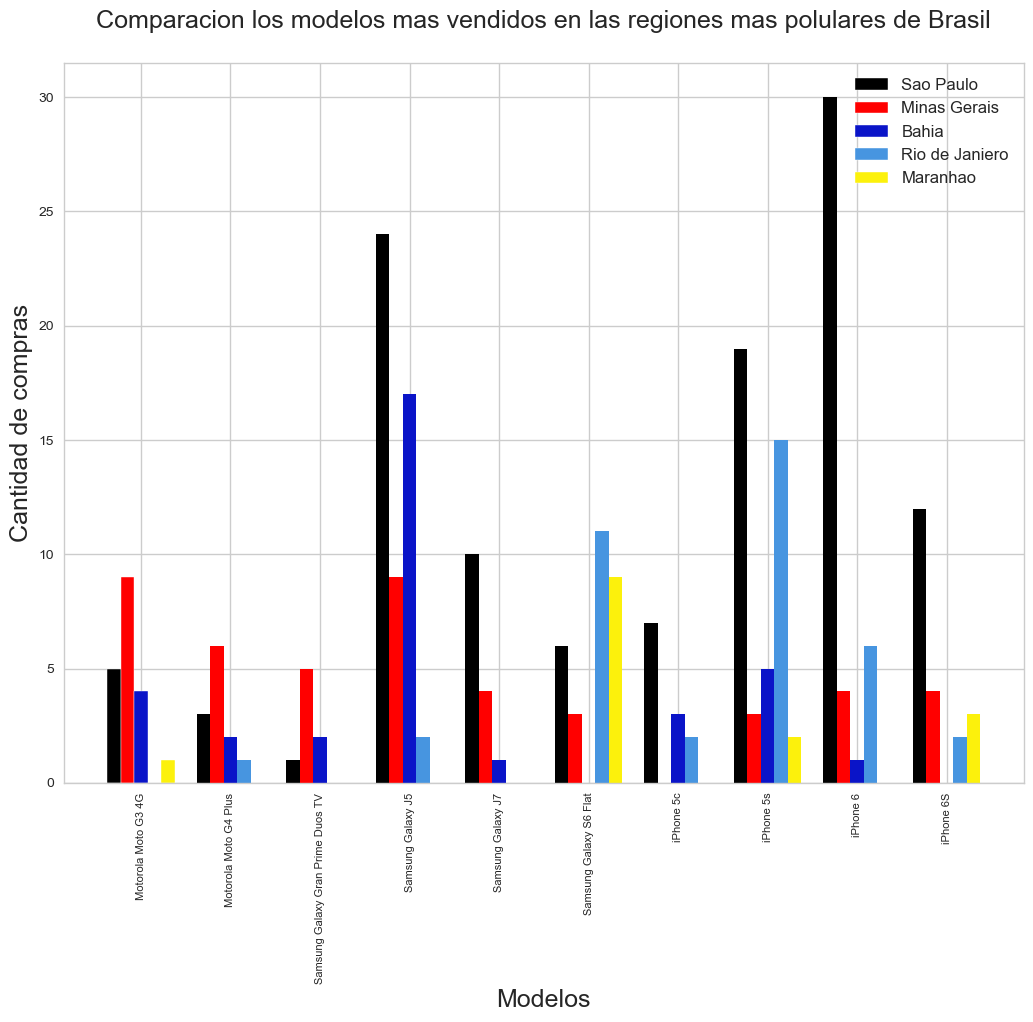

In [79]:


X = np.arange (len(top_10))
Y1 = sao_pablo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio.values
Y5 = maranhao.values



plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Maranhao", width = 0.15, align = "center",edgecolor = "white")


plt.xticks(X,top_10,fontsize = 8,rotation = "vertical")
plt.xlabel("Modelos",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Comparacion los modelos mas vendidos en las regiones mas polulares de Brasil\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()